<a href="https://colab.research.google.com/github/Jeferson100/Projetos_python/blob/main/classificao_problema_coracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descrição do trabalho

Este trabalho tem como metar identificar: Informações do conjunto de dados:

Este banco de dados contém 76 atributos, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. Em particular, o banco de dados de Cleveland é o único usado pelos pesquisadores de ML até hoje. O campo "objetivo" refere-se à presença de doença cardíaca no paciente. É um número inteiro com valor de 0 (sem presença) a 4. Os experimentos com o banco de dados de Cleveland se concentraram em simplesmente tentar distinguir a presença (valores 1,2,3,4) da ausência (valor 0).

Os nomes e números do seguro social dos pacientes foram recentemente removidos do banco de dados e substituídos por valores fictícios.

Um arquivo foi "processado", aquele que contém o banco de dados do Cleveland. Todos os quatro arquivos não processados ​​também existem neste diretório.

Para ver os Custos dos Testes (doados por Peter Turney), consulte a pasta "Custos"

Informação de Atributo:

Apenas 14 atributos usados:

3 (idade):idade: idade em anos//
4sexo: sexo (1 = masculino; 0 = feminino)//
cp: tipo de dor no peito
Valor 1: angina típica
Valor 2: angina atípica
Valor 3: dor não anginosa
Valor 4: assintomático//
trestbps: pressão arterial em repouso (em mm Hg na admissão ao hospital)//
col: colesterol sérico em mg / dl//
fbs: (açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)//
restecg: resultados eletrocardiográficos em repouso
Valor 0: normal
Valor 1: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão de ST> 0,05 mV)
Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes//
32 thalach: freqüência cardíaca máxima alcançada//
38 exang: angina induzida por exercício (1 = sim; 0 = não)//
oldpeak = depressão de ST induzida por exercício em relação ao repouso//
inclinação: a inclinação do pico do segmento ST do exercício
Valor 1: inclinação ascendente
Valor 2: plano
Valor 3 : declive//
ca: número de vasos principais (0-3) coloridos por fluorosopia//
51 tal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível//
58 num: diagnóstico de doença cardíaca (status da doença angiográfica)
Valor 0: estreitamento do diâmetro <50%
Valor 1: estreitamento do diâmetro> 50%

#Etapa 1:IMPORTAÇÃO

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('figure',figsize=(20,15))

In [ ]:
# Importacao dos algoritimos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import GridSearchCV  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score


# ETAPA 2:COLETANDO DADOS
https://archive.ics.uci.edu/ml/datasets/heart+disease

In [ ]:
base = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat',header=None,sep='\s+')

In [ ]:
base.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


##Renomeando as colunas

In [ ]:
nomes_colunas  = ['idade','sexo','tipo_dor_peito','trestbps','col','fbs','restecg','thalach','exang','oldpeak','inclinação',
                  'ca','tal','esta_doente']

In [ ]:
base.columns = nomes_colunas

In [ ]:
base

,idade,sexo,tipo_dor_peito,trestbps,col,fbs,restecg,thalach,exang,oldpeak,inclinação,ca,tal,esta_doente
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [ ]:
base.to_csv('ataque_corracao')

##Modificando os tipos de variaveis

In [ ]:
for i in ['idade','sexo','tipo_dor_peito','trestbps','col','fbs','restecg','thalach','exang','inclinação', 'ca','tal']:
   base[i]= base[i].astype('int')
    

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idade           270 non-null    int64  
 1   sexo            270 non-null    int64  
 2   tipo_dor_peito  270 non-null    int64  
 3   trestbps        270 non-null    int64  
 4   col             270 non-null    int64  
 5   fbs             270 non-null    int64  
 6   restecg         270 non-null    int64  
 7   thalach         270 non-null    int64  
 8   exang           270 non-null    int64  
 9   oldpeak         270 non-null    float64
 10  inclinação      270 non-null    int64  
 11  ca              270 non-null    int64  
 12  tal             270 non-null    int64  
 13  esta_doente     270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


#ETAPA 3:DIVIDINDO TREINO E TESTE

In [ ]:
from sklearn.model_selection import train_test_split
treino,teste = train_test_split(base,test_size=0.3, random_state=42) 

In [ ]:
x_treino = treino.drop('esta_doente',axis=1)

In [ ]:
y_treino = treino['esta_doente']

In [ ]:
y_treino

84     1
251    1
92     2
201    2
126    2
      ..
20     2
188    1
71     1
106    1
102    1
Name: esta_doente, Length: 189, dtype: int64

In [ ]:
x_teste = teste.drop('esta_doente',axis=1)
x_teste

,idade,sexo,tipo_dor_peito,trestbps,col,fbs,restecg,thalach,exang,oldpeak,inclinação,ca,tal
30,57,1,3,128,229,0,2,150,0,0.4,2,1,7
116,46,1,4,120,249,0,2,144,0,0.8,1,0,7
79,56,1,2,120,236,0,0,178,0,0.8,1,0,3
127,52,0,3,136,196,0,2,169,0,0.1,2,0,3
196,58,0,4,100,248,0,2,122,0,1.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,41,0,2,105,198,0,0,168,0,0.0,1,1,3
97,58,1,4,100,234,0,0,156,0,0.1,1,1,7
200,68,1,3,118,277,0,0,151,0,1.0,1,1,7
38,42,1,3,130,180,0,0,150,0,0.0,1,0,3


In [ ]:
y_teste = teste['esta_doente']

In [ ]:
x_treino.shape


(189, 13)

In [ ]:
x_teste.shape

(81, 13)

In [ ]:
y_teste.shape

(81,)

In [ ]:
y_treino.shape

(189,)

# Etapa 4:Analise descritiva


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idade           270 non-null    int64  
 1   sexo            270 non-null    int64  
 2   tipo_dor_peito  270 non-null    int64  
 3   trestbps        270 non-null    int64  
 4   col             270 non-null    int64  
 5   fbs             270 non-null    int64  
 6   restecg         270 non-null    int64  
 7   thalach         270 non-null    int64  
 8   exang           270 non-null    int64  
 9   oldpeak         270 non-null    float64
 10  inclinação      270 non-null    int64  
 11  ca              270 non-null    int64  
 12  tal             270 non-null    int64  
 13  esta_doente     270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [ ]:
base.describe()

,idade,sexo,tipo_dor_peito,trestbps,col,fbs,restecg,thalach,exang,oldpeak,inclinação,ca,tal,esta_doente
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
base.isnull().sum()

idade             0
sexo              0
tipo_dor_peito    0
trestbps          0
col               0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
inclinação        0
ca                0
tal               0
esta_doente       0
dtype: int64

In [ ]:
for i in base.columns:
   print(i)
   print(base[i].unique())
   print('------')

idade
[70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
------
sexo
[1 0]
------
tipo_dor_peito
[4 3 2 1]
------
trestbps
[130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
------
col
[322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353 335 247 340 284 192]
------
fbs
[0 

In [ ]:
for i in base.columns:
   print(i)
   print(base[i].value_counts())
   print('------')
base[i].value_counts()

idade
54    16
58    15
51    12
57    12
59    12
60    12
62    11
52    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
63     7
61     7
43     7
45     7
53     7
46     7
50     7
48     7
66     6
55     6
49     5
47     4
70     4
69     3
35     3
71     3
68     3
40     3
39     3
37     2
34     2
77     1
38     1
76     1
74     1
29     1
Name: idade, dtype: int64
------
sexo
1    183
0     87
Name: sexo, dtype: int64
------
tipo_dor_peito
4    129
3     79
2     42
1     20
Name: tipo_dor_peito, dtype: int64
------
trestbps
120    34
130    31
140    30
150    17
110    17
160    11
125    10
112     9
138     9
128     9
118     7
132     6
135     6
108     6
145     5
124     5
134     4
152     4
100     4
122     3
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
178     2
170     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
158     1
192     1
156     1
117     1
155     1
148     1
146  

1    150
2    120
Name: esta_doente, dtype: int64

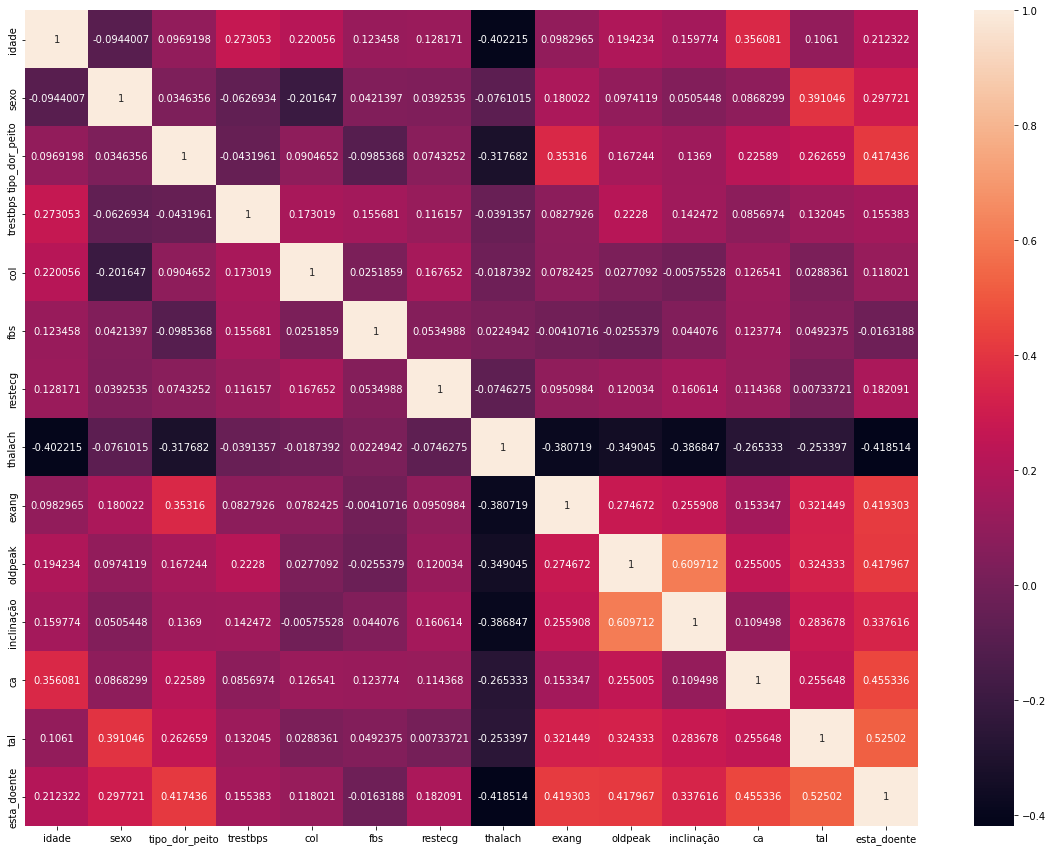

In [ ]:
sns.heatmap(base.corr(),fmt= 'g',annot=True);

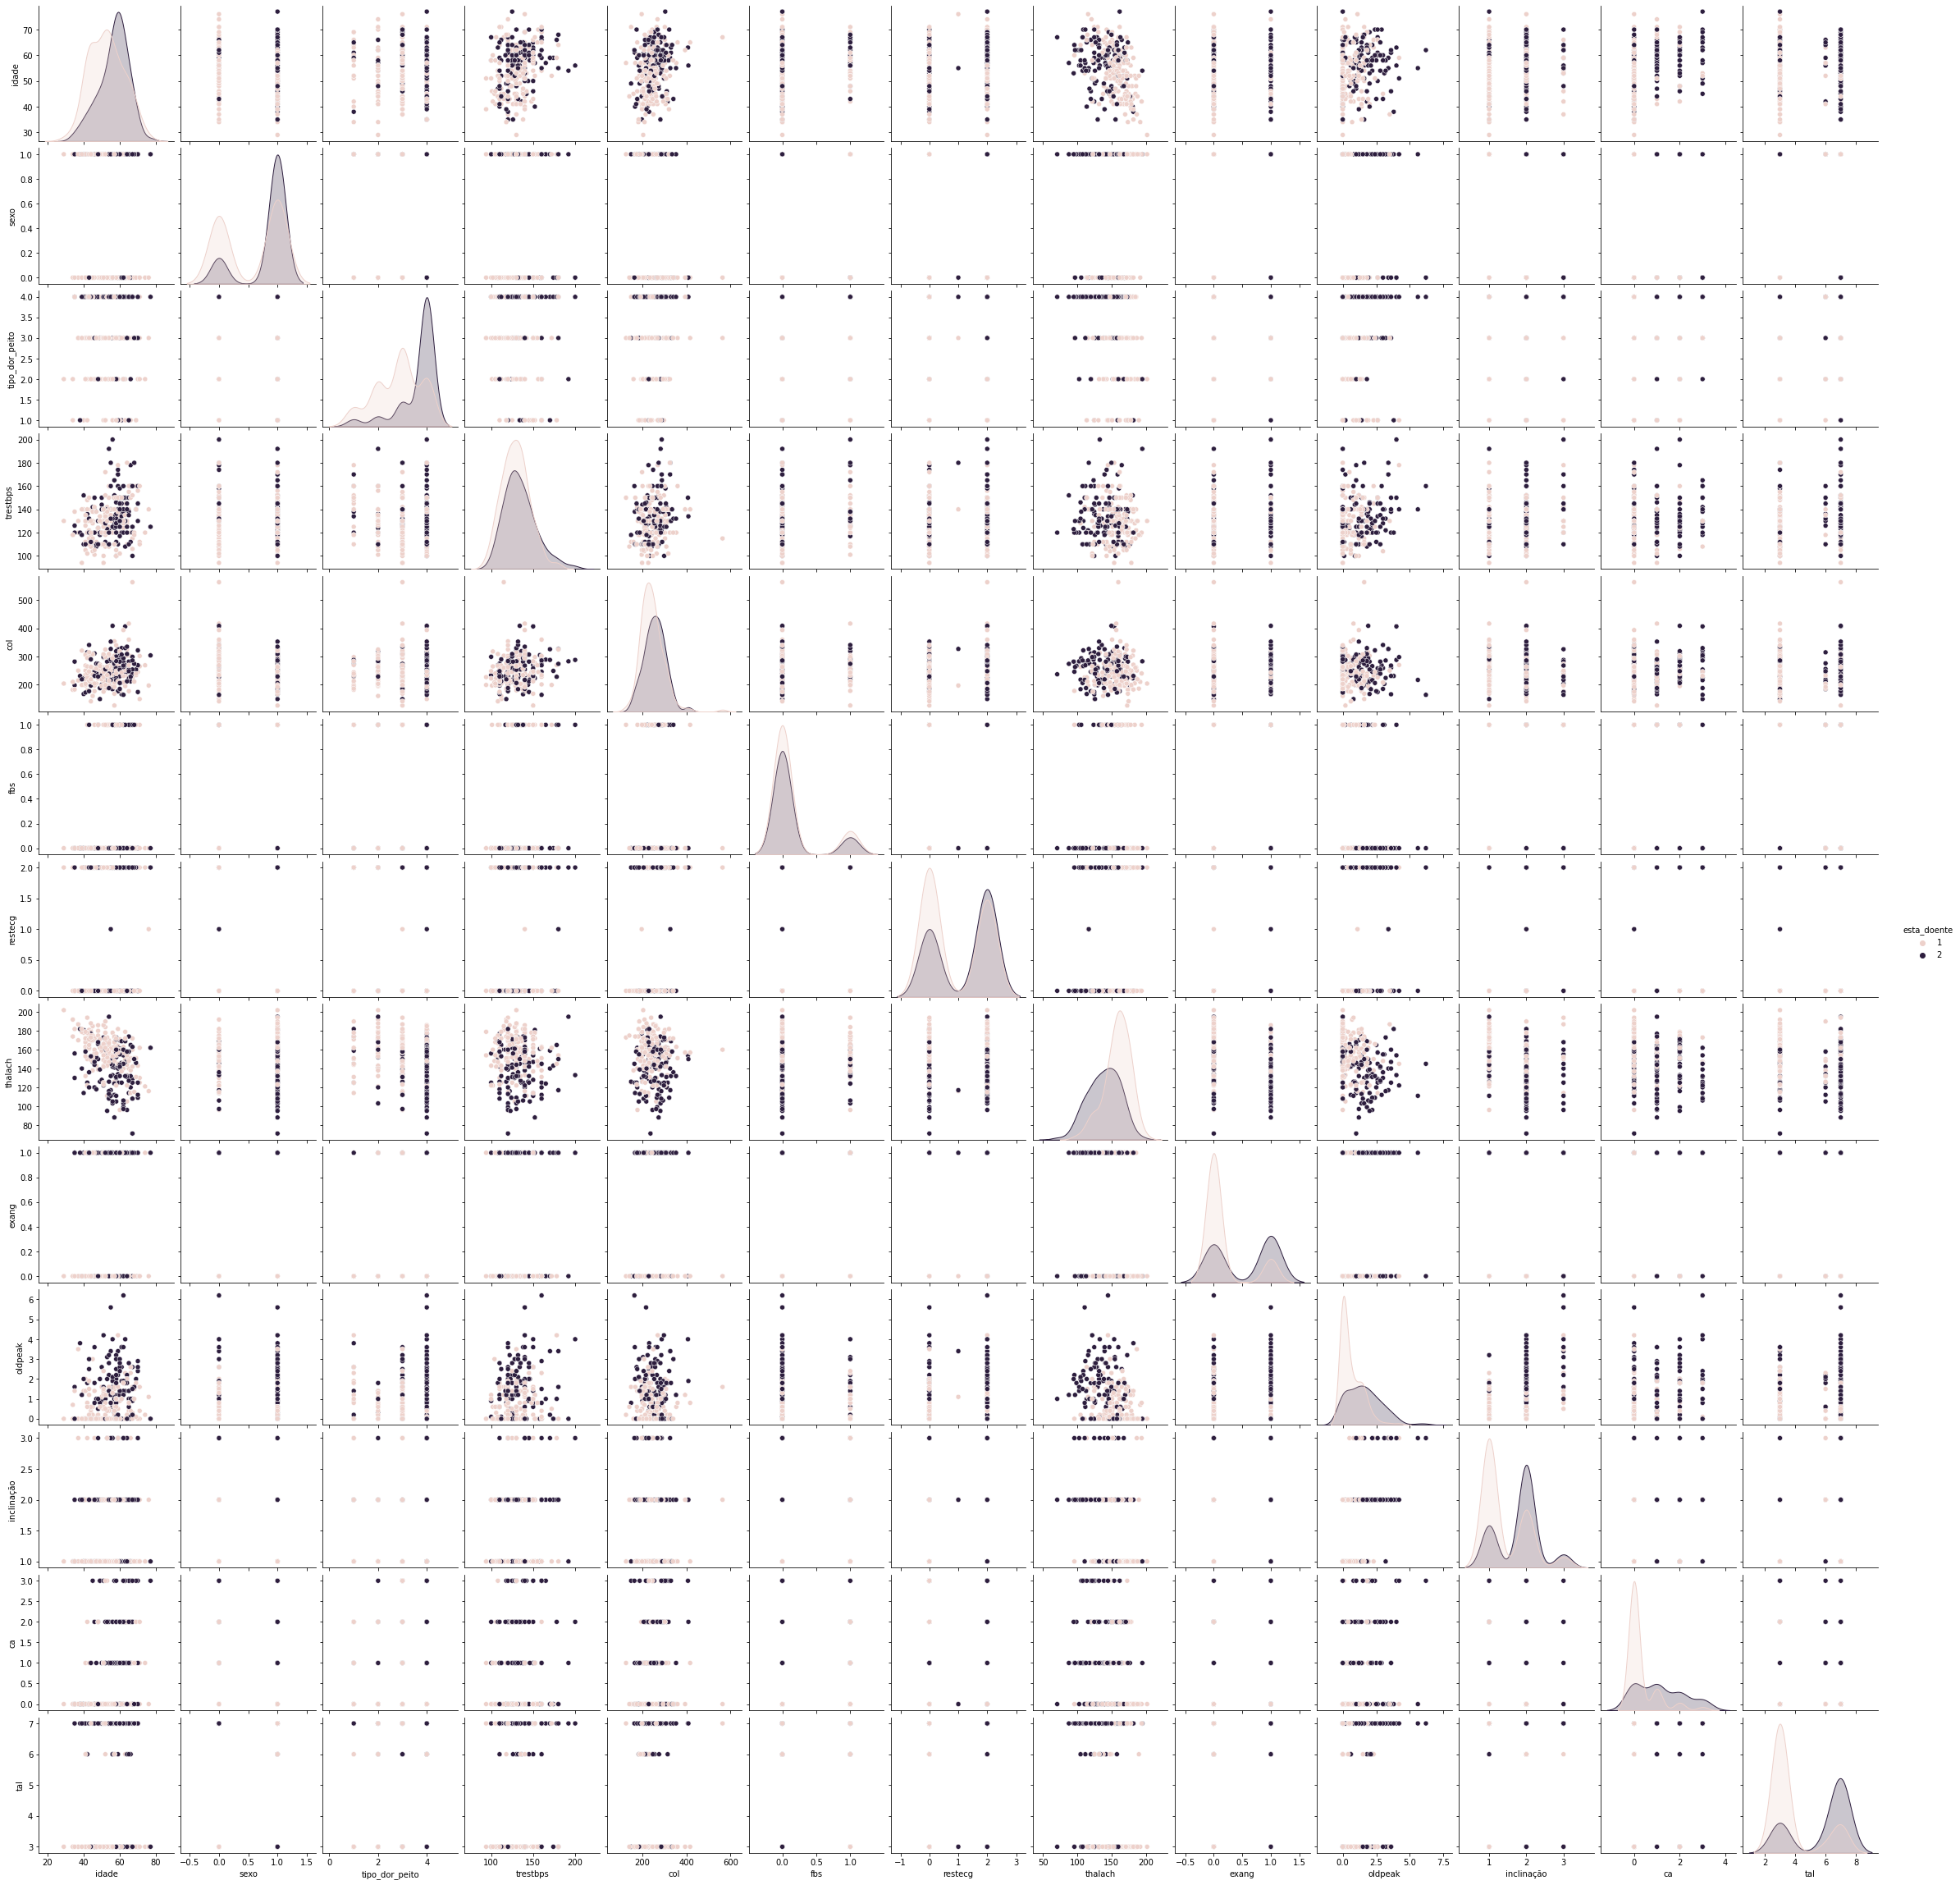

In [ ]:
sns.pairplot(base,hue= 'esta_doente')

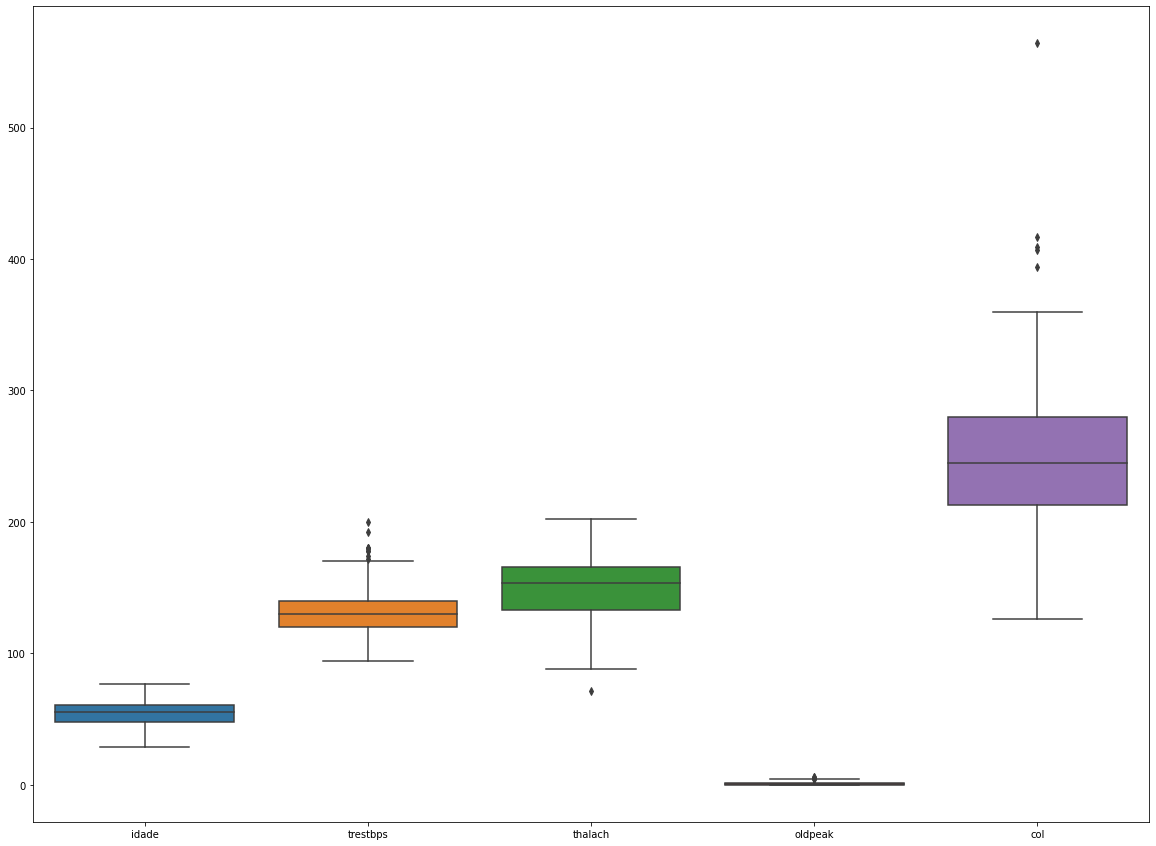

In [ ]:

sns.boxplot(data=base[['idade','trestbps','thalach','oldpeak','col']],orient='v');

In [ ]:
base[base.col> 370]['col']

1      564
9      407
52     417
181    409
188    394
Name: col, dtype: int64

In [ ]:
base.loc[base['col'] > 350,['col','esta_doente']]

,col,esta_doente
1,564,1
9,407,2
52,417,1
71,354,1
123,360,1
181,409,2
188,394,1
257,353,2


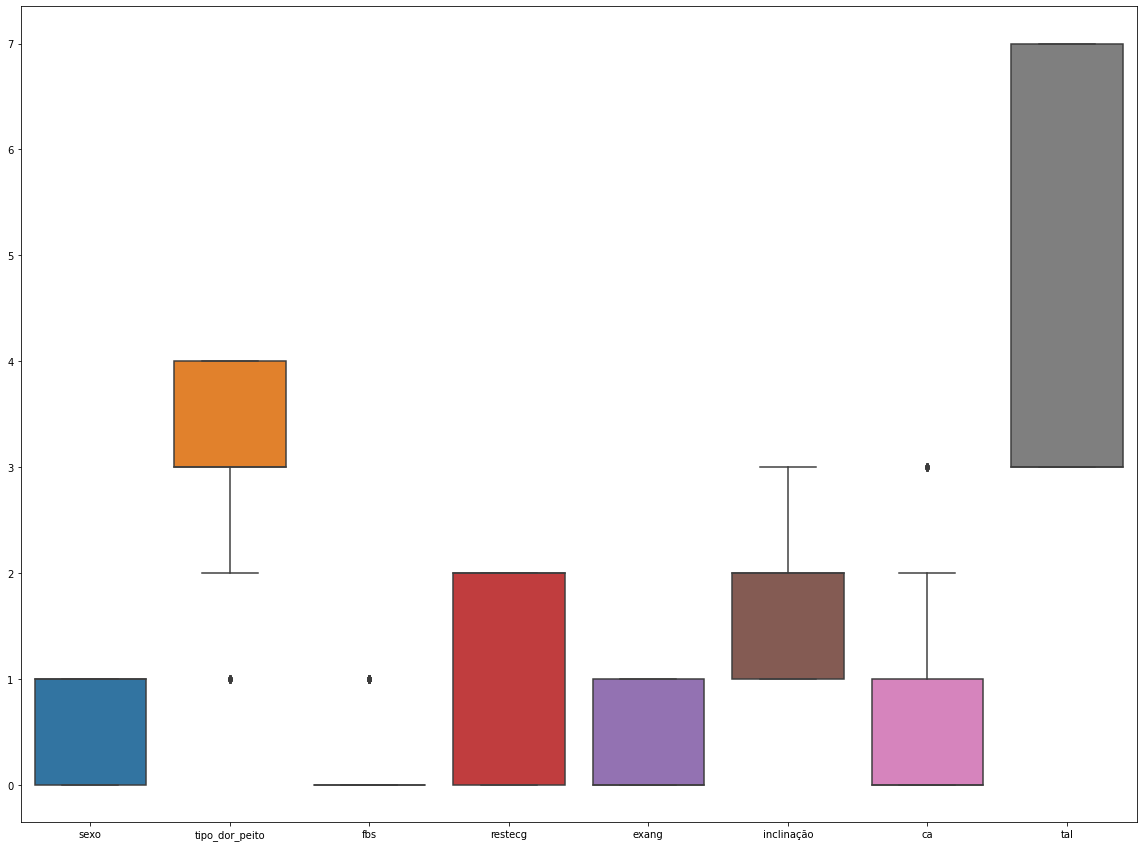

In [ ]:
sns.boxplot(data=base[['sexo','tipo_dor_peito','fbs','restecg','exang','inclinação',
                  'ca','tal']],orient='v');

AxesSubplot(0.125,0.125;0.775x0.755)


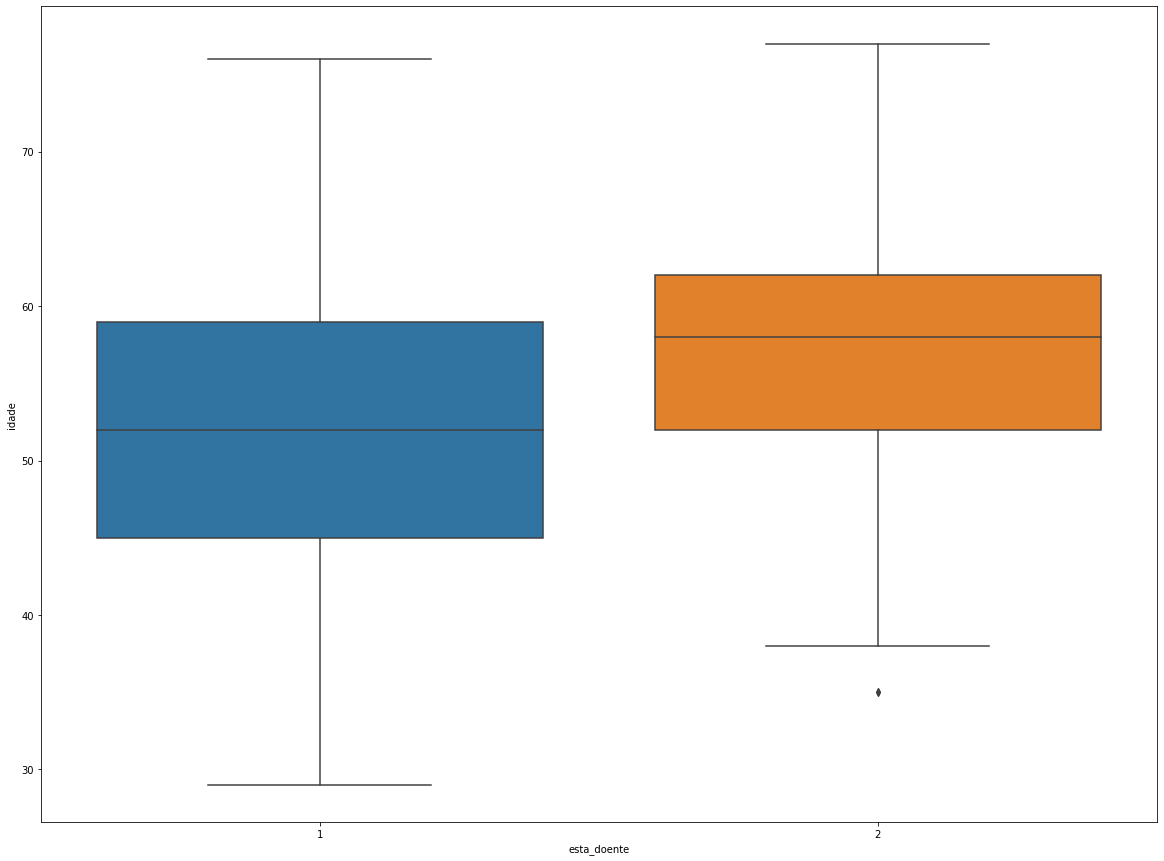

In [ ]:
print(sns.boxplot(x=base['esta_doente'],y=base['idade'],orient='v'))

AxesSubplot(0.125,0.125;0.775x0.755)


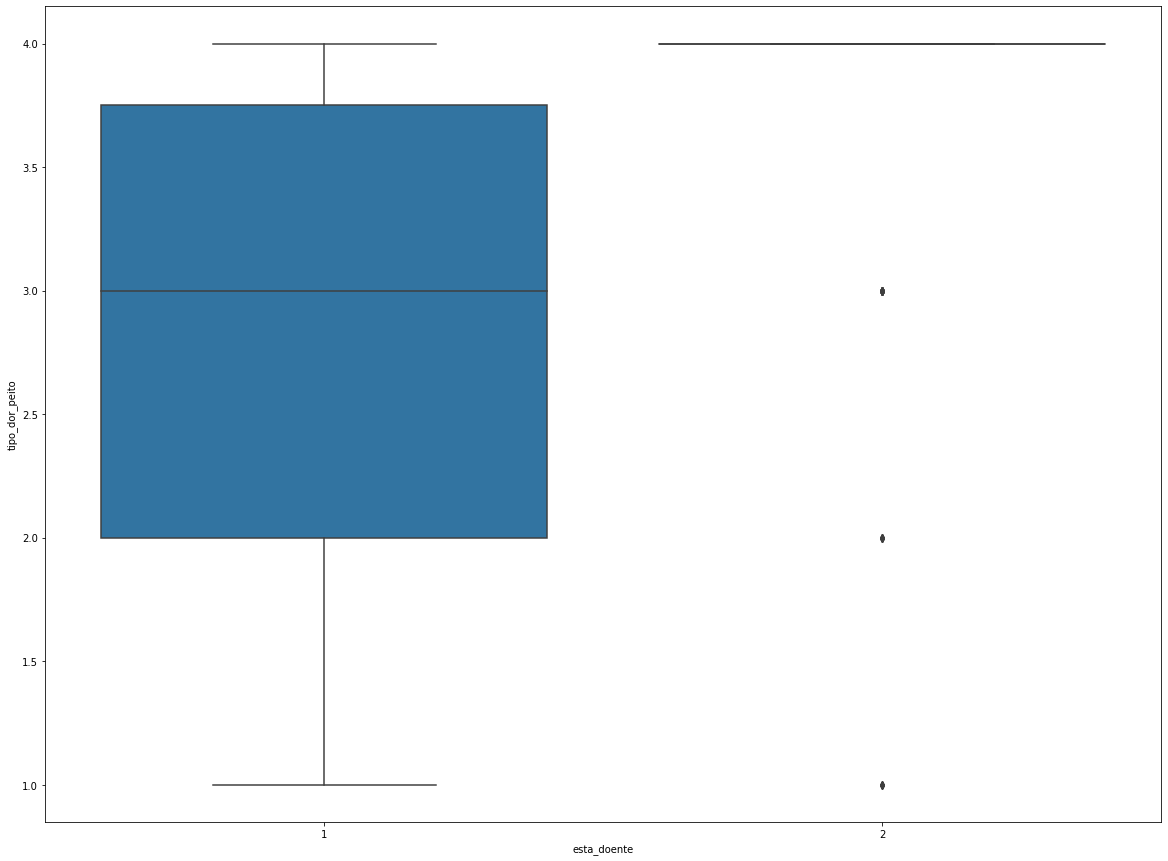

In [ ]:
print(sns.boxplot(x=base['esta_doente'],y=base['tipo_dor_peito'],orient='v'))

# ETAPA 5: Tratando os dados
# Nao ha nenhuma variavel faltante e a poucos autliers que nao influenciaram no resultado.

# sera aplicada estes tipos de tratamentos nos dados
#idade  = escalonando
# sexo = nao muda
#tipo_dor_peito = variavel dummy
#trestbps = escalonando
#col= escalonando
#fbs=nao muda
#restecg = dummy
#thalach	=escalonando
#exang	=nao muda
#oldpeak = escalonando
#inclinação=dummy
#ca = dummy
#tal=dummy
#esta_doente = dummy

##TRATANDO OS NOS DADOS DE TREINO

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

In [ ]:
numerica = ['idade','trestbps','col','thalach','oldpeak']
atributos = ['tipo_dor_peito','restecg','inclinação','ca','tal']
nao_muda=['sexo','fbs','exang']

In [ ]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),])


In [ ]:
## remainder especifica se as colunas que nao passaram por algum tratamento serao mantidas, o defaul e drop se colocar passthrough seram mantidas
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerica),
        ("cat", OneHotEncoder(), atributos)
    ],remainder = 'passthrough')

In [ ]:
treino_transformada = full_pipeline.fit_transform(x_treino)

In [ ]:
treino_transformada.shape

(189, 25)

In [ ]:
y_trein = np.where(y_treino == 1,0,1)

##TRATANDO OS DADOS DE TREINO

In [ ]:
teste_transformado= full_pipeline.transform(x_teste)

In [ ]:
teste_transformado.shape

(81, 25)

In [ ]:
y_test = np.where(y_teste == 1,0,1)

# ETAPA 6: CRIANDO OS MODELOS

## TREINANDO O CLASSIFICADOR COM REGRESSAO LOGISTICA

In [ ]:
treino_transformada

array([[ 0.2468849 , -1.21809085, -0.96400751, ...,  1.        ,
         0.        ,  1.        ],
       [-1.18040026, -0.10106431, -0.62059876, ...,  1.        ,
         0.        ,  0.        ],
       [-0.0824886 , -0.43617227,  0.27607964, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.2468849 , -0.65957758,  1.95496685, ...,  0.        ,
         0.        ,  1.        ],
       [-0.4118621 , -1.77660412, -0.56336397, ...,  1.        ,
         0.        ,  1.        ],
       [-0.63144443, -0.10106431,  0.33331443, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(treino_transformada, y_trein)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
log_predicao = log_reg.predict(treino_transformada)

### AVALIANDO O MODELO

In [ ]:
## confusion matriz
from sklearn.metrics import confusion_matrix

confusion_matrix(y_trein,log_predicao)

array([[93,  8],
       [12, 76]])

In [ ]:
##PRECISAO = QUANTOS DOS QUE O MODELO DICE QUE SAO VERDADEIROS ELE ACERTOU
from sklearn.metrics import precision_score, recall_score

precisao_logistica = precision_score(y_trein,log_predicao)## se a classe estiver categorica use "",average="binary", pos_label="eventos de recorrência"""
precisao_logistica

0.9047619047619048

In [ ]:
## QUANTO DOS VALORES VERDADEIROS O MODELO ACERTOU
revocacao_logistica = recall_score(y_trein,log_predicao,average="binary")
revocacao_logistica

0.8636363636363636

In [ ]:
from sklearn.metrics import f1_score
f1_logistica = f1_score(y_trein,log_predicao)
f1_logistica

0.8837209302325582

In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(log_reg, treino_transformada, y_trein, cv=10, scoring="accuracy")
validacao_logistica = a.mean()
validacao_logistica

0.8467836257309941

###AVALIANDO MODELO NOS DADOS DE TESTE

In [ ]:
log_predicao_teste = log_reg.predict(teste_transformado)

In [ ]:
confusion_matrix(y_test,log_predicao_teste)

array([[46,  3],
       [10, 22]])

In [ ]:
##PRECISAO = QUANTOS DOS QUE O MODELO DICE QUE SAO VERDADEIROS ELE ACERTOU
from sklearn.metrics import precision_score, recall_score

precisao_logistica_test = precision_score(y_test,log_predicao_teste)## se a classe estiver categorica use "",average="binary", pos_label="eventos de recorrência"""
precisao_logistica_test

0.88

In [ ]:
## QUANTO DOS VALORES VERDADEIROS O MODELO ACERTOU
revocacao_logistica_teste = recall_score(y_test,log_predicao_teste,average="binary")
revocacao_logistica_teste

0.6875

In [ ]:
from sklearn.metrics import f1_score
f1_logistica = f1_score(y_test,log_predicao_teste)
f1_logistica

0.7719298245614036

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_predicao_teste));

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        49
           1       0.88      0.69      0.77        32

    accuracy                           0.84        81
   macro avg       0.85      0.81      0.82        81
weighted avg       0.84      0.84      0.84        81



In [ ]:
logis_test= cross_val_predict(log_reg, teste_transformado, y_test, cv=10,method="predict_proba")
logis_test

array([[0.1845317 , 0.8154683 ],
       [0.10824619, 0.89175381],
       [0.98368012, 0.01631988],
       [0.98180226, 0.01819774],
       [0.61549693, 0.38450307],
       [0.32766034, 0.67233966],
       [0.99210123, 0.00789877],
       [0.94839389, 0.05160611],
       [0.62405088, 0.37594912],
       [0.96975118, 0.03024882],
       [0.41162595, 0.58837405],
       [0.73742102, 0.26257898],
       [0.17379475, 0.82620525],
       [0.00737536, 0.99262464],
       [0.49629114, 0.50370886],
       [0.86713636, 0.13286364],
       [0.105343  , 0.894657  ],
       [0.8196981 , 0.1803019 ],
       [0.03299559, 0.96700441],
       [0.75728935, 0.24271065],
       [0.01930634, 0.98069366],
       [0.75090122, 0.24909878],
       [0.58227747, 0.41772253],
       [0.97337923, 0.02662077],
       [0.62540639, 0.37459361],
       [0.01787129, 0.98212871],
       [0.93494933, 0.06505067],
       [0.22120989, 0.77879011],
       [0.98432938, 0.01567062],
       [0.63179855, 0.36820145],
       [0.

###PLOTANDO A CURVA DE TROCA DE REVOCACAO E PRECISAO

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test,log_predicao_teste)

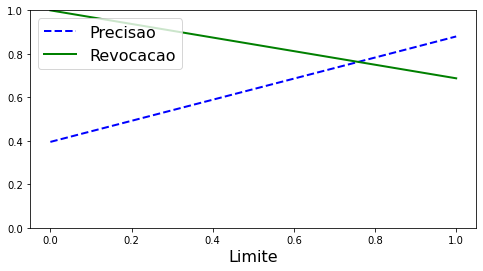

In [ ]:
## PLOTANDO O GANHO DE MUDAR O LIMIAR DE UMA DECISAO ATRAVES A TROCA ENTRE REVOCACAO E PRECISAO
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precisao", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Revocacao", linewidth=2)
    plt.xlabel("Limite", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

###PLOTANDO A CURVA ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,log_predicao_teste)


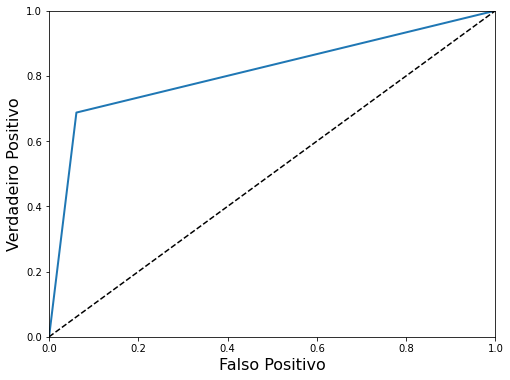

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Falso Positivo', fontsize=16)
    plt.ylabel('Verdadeiro Positivo', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
## AREA ABAIXO DA CURRVA ROC CHAMADA AUC
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,log_predicao_teste)

0.8131377551020409

##TREINANDO O CLASSIFICADOR RANDOM FOREST


In [ ]:
class_random= DecisionTreeClassifier(max_depth=100, random_state=42,min_samples_leaf=4)
class_random.fit(treino_transformada, y_trein)

DecisionTreeClassifier(max_depth=100, min_samples_leaf=4, random_state=42)

###Avaliando nos conjuntos de treinamaneto

In [ ]:
predicao_random_treino= class_random.predict(treino_transformada)

Text(0.5, 1.0, 'Matriz de confusao')

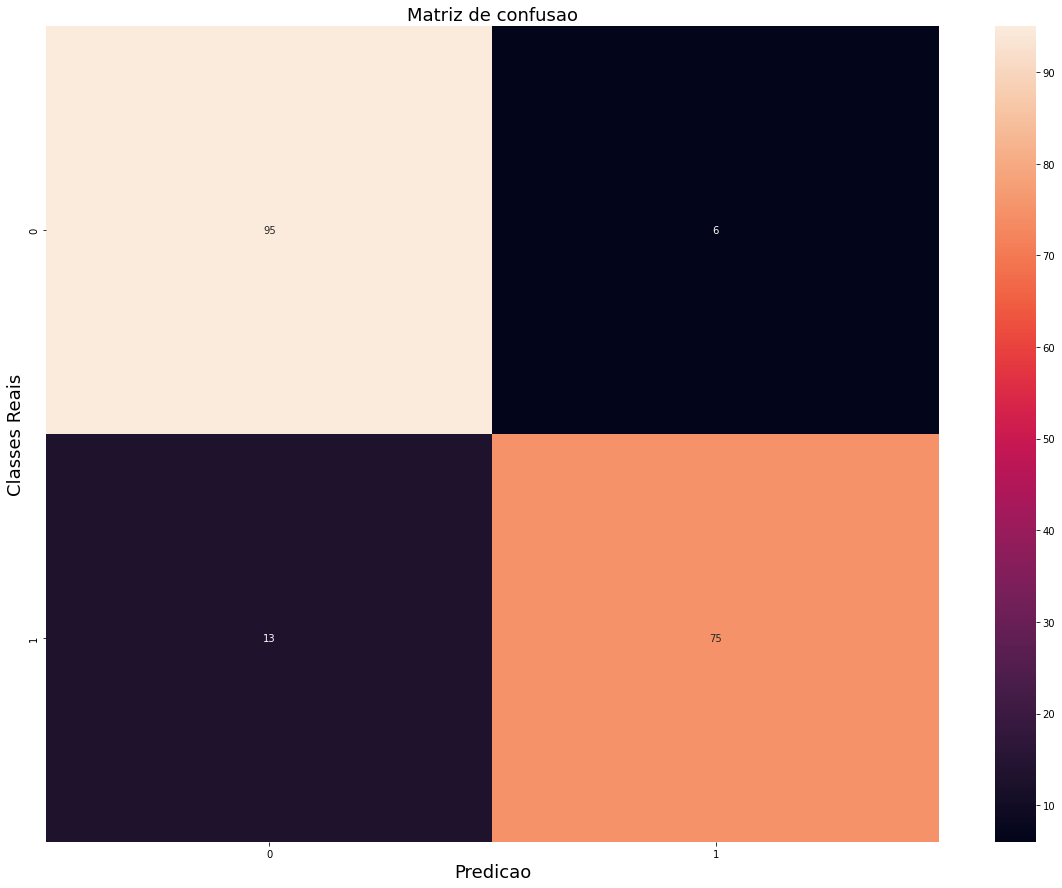

In [ ]:
sns.heatmap(confusion_matrix(y_trein,predicao_random_treino),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)



In [ ]:
cross_val_score(class_random, treino_transformada, y_trein, cv=10)

array([0.73684211, 0.68421053, 0.78947368, 0.73684211, 0.89473684,
       0.73684211, 0.68421053, 0.78947368, 0.68421053, 0.77777778])

In [ ]:
print(classification_report(y_trein,predicao_random_treino));

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       101
           1       0.93      0.85      0.89        88

    accuracy                           0.90       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.90      0.90      0.90       189



###Avaliando nos conjuntos de teste

In [ ]:
predicao_random_teste = class_random.predict(teste_transformado)

In [ ]:
random_test= cross_val_predict(class_random, teste_transformado, y_test, cv=10,method="predict_proba")
random_test

array([[0.25      , 0.75      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.75      , 0.25      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.6       , 0.4       ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [0.

Text(0.5, 1.0, 'Matriz de confusao')

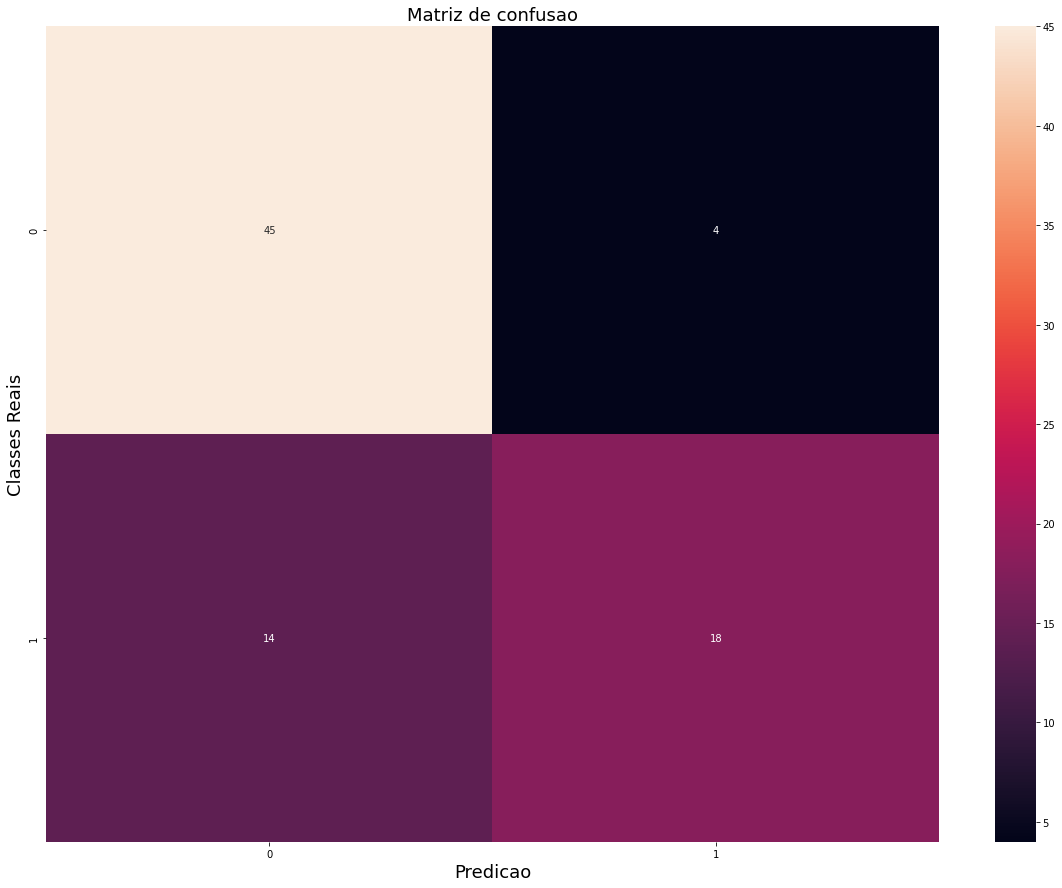

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicao_random_teste),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
print(classification_report(y_test,predicao_random_teste));

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        49
           1       0.82      0.56      0.67        32

    accuracy                           0.78        81
   macro avg       0.79      0.74      0.75        81
weighted avg       0.78      0.78      0.77        81



##TREINANDO O CLASSIFICADOR EXTRA TREES

In [ ]:
extra_tree = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_tree.fit(treino_transformada, y_trein)

ExtraTreesClassifier(random_state=42)

###Avaliando no conjunto de treinamento

In [ ]:
predicao_extra_treino= extra_tree.predict(treino_transformada)

Text(0.5, 1.0, 'Matriz de confusao')

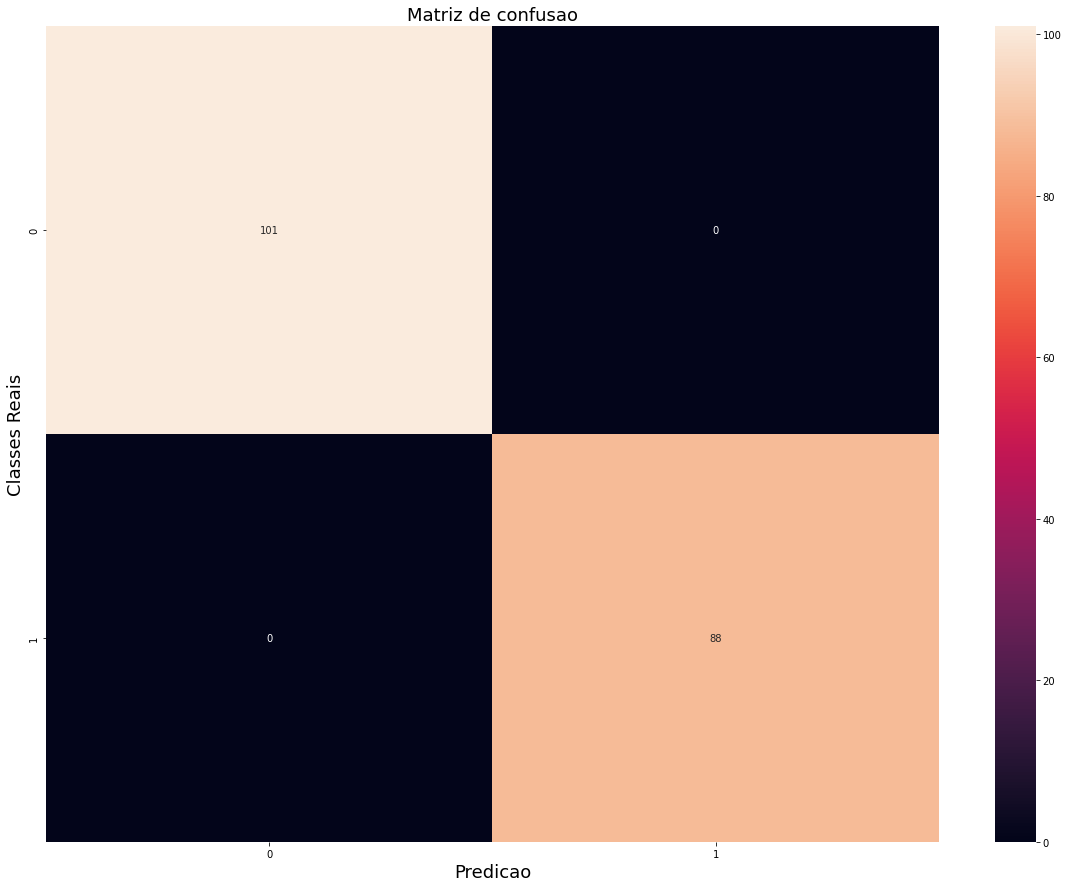

In [ ]:
sns.heatmap(confusion_matrix(y_trein,predicao_extra_treino),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
cross_val_score(extra_tree_desb, treino_transformada, y_trein, cv=10)


array([0.63157895, 0.73684211, 0.89473684, 1.        , 0.84210526,
       0.73684211, 0.78947368, 0.84210526, 0.68421053, 0.83333333])

In [ ]:
print(classification_report(y_trein,predicao_extra_treino));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        88

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



###Avaliando no conjunto de teste

In [ ]:
predicao_extra_test= extra_tree.predict(teste_transformado)

In [ ]:
extra_test= cross_val_predict(extra_tree, teste_transformado, y_test, cv=10,method="predict_proba")
extra_test

array([[0.12, 0.88],
       [0.1 , 0.9 ],
       [0.93, 0.07],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.19, 0.81],
       [0.93, 0.07],
       [0.94, 0.06],
       [0.36, 0.64],
       [0.97, 0.03],
       [0.92, 0.08],
       [0.78, 0.22],
       [0.23, 0.77],
       [0.02, 0.98],
       [0.56, 0.44],
       [0.7 , 0.3 ],
       [0.25, 0.75],
       [0.47, 0.53],
       [0.02, 0.98],
       [0.44, 0.56],
       [0.02, 0.98],
       [0.75, 0.25],
       [0.84, 0.16],
       [0.94, 0.06],
       [0.87, 0.13],
       [0.08, 0.92],
       [0.55, 0.45],
       [0.31, 0.69],
       [0.98, 0.02],
       [0.46, 0.54],
       [0.9 , 0.1 ],
       [0.75, 0.25],
       [0.4 , 0.6 ],
       [0.81, 0.19],
       [0.21, 0.79],
       [0.44, 0.56],
       [0.24, 0.76],
       [0.91, 0.09],
       [0.07, 0.93],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.63, 0.37],
       [0.76, 0.24],
       [0.99, 0.01],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.61,

Text(0.5, 1.0, 'Matriz de confusao')

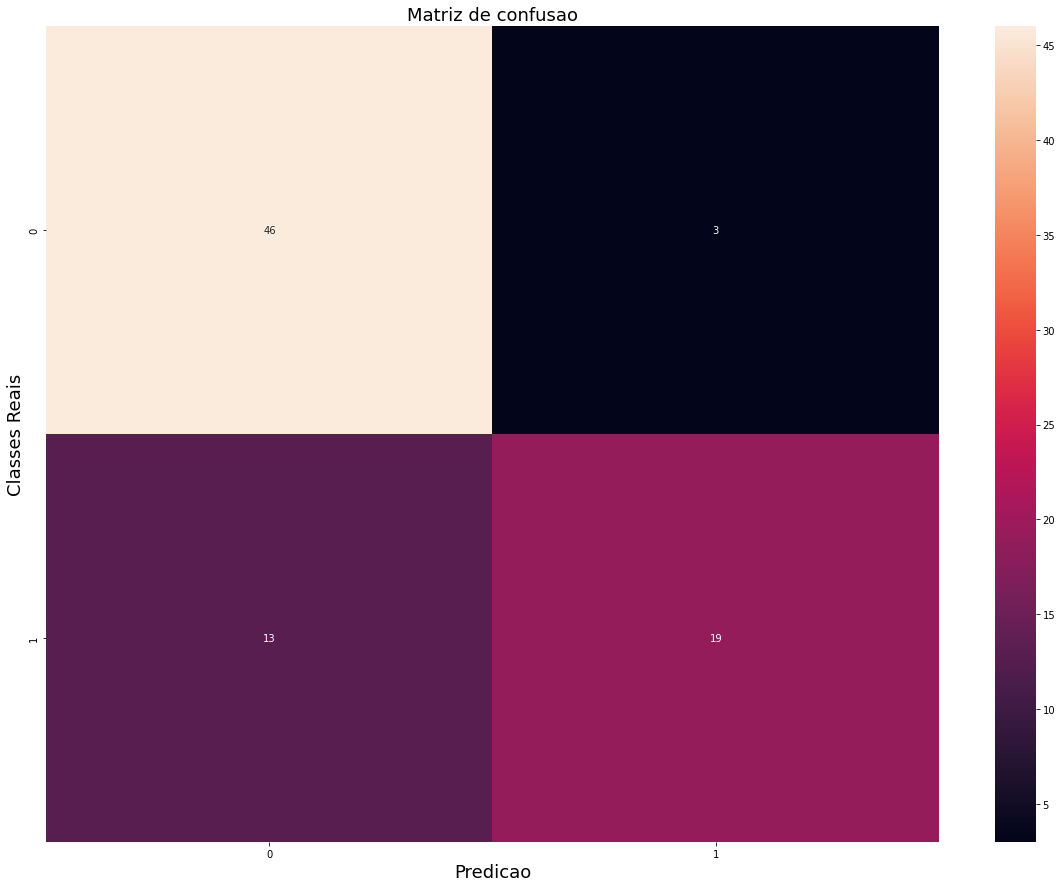

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicao_extra_test),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
print(classification_report(y_test,predicao_extra_test));

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        49
           1       0.86      0.59      0.70        32

    accuracy                           0.80        81
   macro avg       0.82      0.77      0.78        81
weighted avg       0.81      0.80      0.79        81



##TREINANDO O ALGORITIMO XGBOOST

In [ ]:
xg_boost= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
xg_boost.fit(treino_transformada, y_trein)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

###Avaliando no conjunto de treinamento

In [ ]:
predicao_xg_treino= xg_boost.predict(treino_transformada)

Text(0.5, 1.0, 'Matriz de confusao')

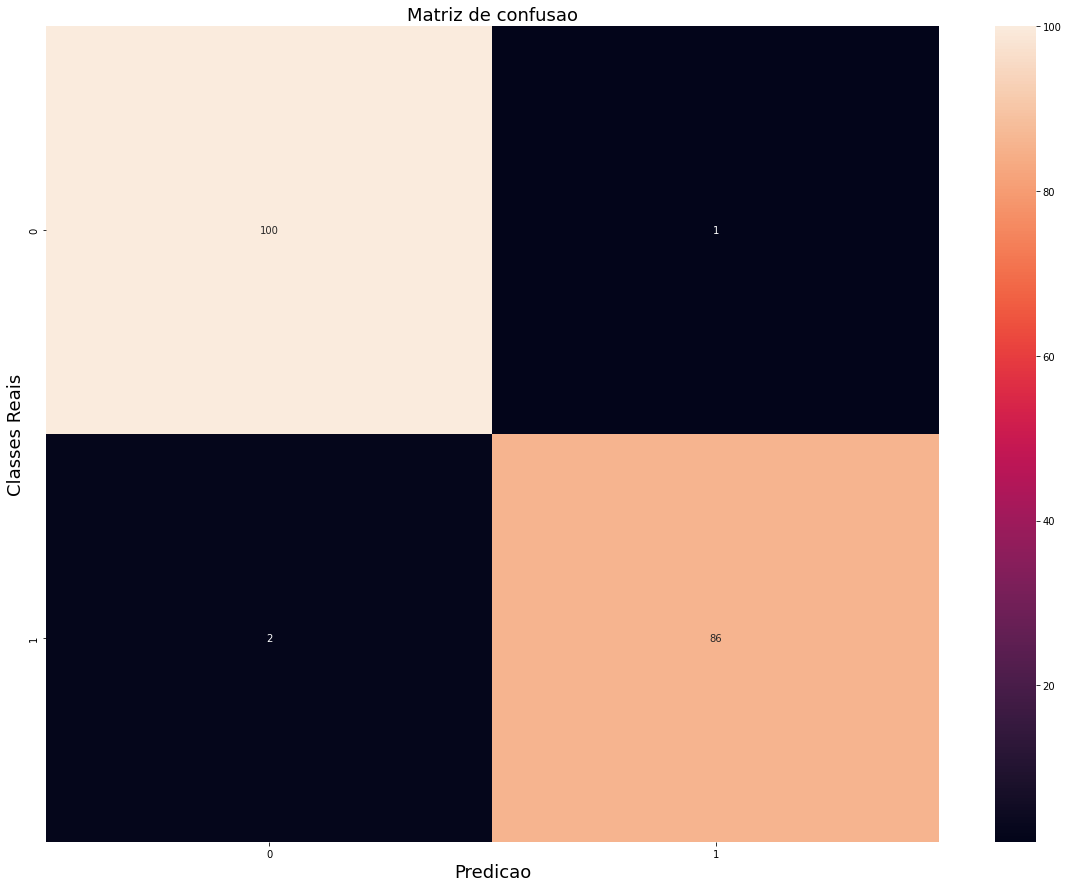

In [ ]:
sns.heatmap(confusion_matrix(y_trein,predicao_xg_treino),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
cross_val_score(xg_boost, treino_transformada, y_trein, cv=10)


array([0.68421053, 0.68421053, 0.73684211, 0.94736842, 0.78947368,
       0.78947368, 0.78947368, 0.89473684, 0.78947368, 0.72222222])

In [ ]:
print(classification_report(y_trein,predicao_xg_treino));

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       101
           1       0.99      0.98      0.98        88

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189



###Avaliando no conjunto teste


In [ ]:
predicao_xg_teste= xg_boost.predict(teste_transformado)

In [ ]:
xg_test= cross_val_predict(xg_boost, teste_transformado, y_test, cv=10,method="predict_proba")
xg_test

array([[6.29957271e-03, 9.93700427e-01],
       [8.47473623e-01, 1.52526377e-01],
       [9.99998600e-01, 1.39976277e-06],
       [9.99999456e-01, 5.43839042e-07],
       [9.18107061e-01, 8.18929389e-02],
       [7.39336206e-01, 2.60663794e-01],
       [9.99999844e-01, 1.56297877e-07],
       [9.98696718e-01, 1.30328189e-03],
       [1.26091174e-01, 8.73908826e-01],
       [9.91199519e-01, 8.80048103e-03],
       [6.18018107e-01, 3.81981893e-01],
       [9.35713809e-01, 6.42861913e-02],
       [9.34484546e-01, 6.55154540e-02],
       [2.45916852e-05, 9.99975408e-01],
       [7.03951770e-05, 9.99929605e-01],
       [2.47131896e-01, 7.52868104e-01],
       [2.37130291e-01, 7.62869709e-01],
       [9.57602368e-01, 4.23976321e-02],
       [1.07363651e-04, 9.99892636e-01],
       [8.30797520e-01, 1.69202480e-01],
       [3.84449677e-04, 9.99615550e-01],
       [7.15092075e-01, 2.84907925e-01],
       [7.53068874e-01, 2.46931126e-01],
       [9.97417658e-01, 2.58234201e-03],
       [1.467047

Text(0.5, 1.0, 'Matriz de confusao')

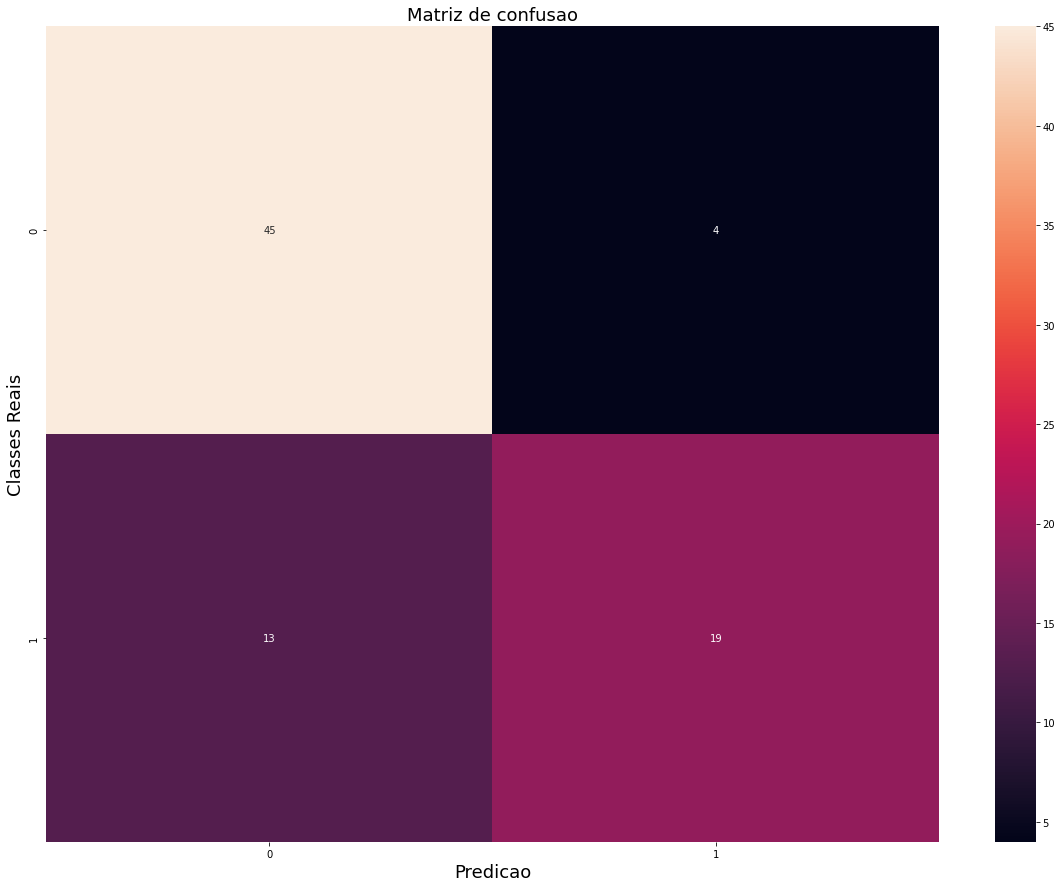

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicao_xg_teste),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
print(classification_report(y_test,predicao_xg_teste));

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        49
           1       0.83      0.59      0.69        32

    accuracy                           0.79        81
   macro avg       0.80      0.76      0.77        81
weighted avg       0.80      0.79      0.78        81



##TREINANDO O CLASSIFICADOR DE REDES NEURAIS

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(25,),activity_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(units=100,activation='relu',activity_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(units=100,activation='relu',activity_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               2600      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics='accuracy')

In [ ]:
epochs_hist = model.fit(treino_transformada, y_trein, epochs=200,batch_size=500)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 1.0295 - accuracy: 0.4392
Epoch 2/200
1/1 [==============================] - 0s 18ms/step - loss: 0.9927 - accuracy: 0.4815
Epoch 3/200
1/1 [==============================] - 0s 19ms/step - loss: 0.9852 - accuracy: 0.4815
Epoch 4/200
1/1 [==============================] - 0s 16ms/step - loss: 1.0322 - accuracy: 0.4868
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 1.0414 - accuracy: 0.4550
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 1.0353 - accuracy: 0.4603
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 1.0166 - accuracy: 0.4762
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.9983 - accuracy: 0.4656
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 0.9840 - accuracy: 0.5132
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 0.9933 - accuracy: 0.4868
Epoch 11/200
1/1 [====

###Avaliando no conjunto de treino

In [ ]:
predicao_rede_treino= model.predict(treino_transformada)

In [ ]:
predicao_rede_treino= (predicao_rede_treino>0.5)

Text(0.5, 1.0, 'Confusion Matrix')

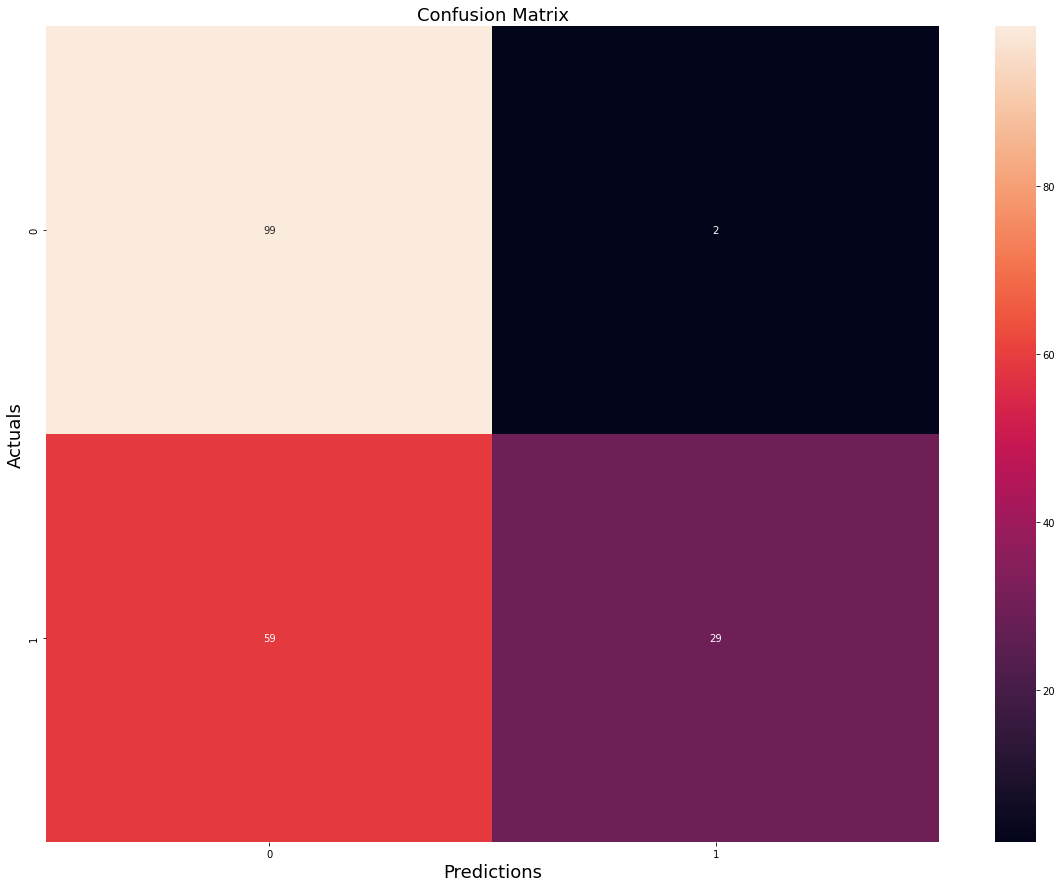

In [ ]:
sns.heatmap(confusion_matrix(y_trein,predicao_rede_treino),annot=True,fmt='g')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [ ]:
print(classification_report(y_trein,predicao_rede_treino));

              precision    recall  f1-score   support

           0       0.63      0.98      0.76       101
           1       0.94      0.33      0.49        88

    accuracy                           0.68       189
   macro avg       0.78      0.65      0.63       189
weighted avg       0.77      0.68      0.64       189



###Avaliando no conjunto teste




In [ ]:
predicao_rede_test_prob= model.predict(teste_transformado)

In [ ]:
predicao_rede_test= (predicao_rede_test_prob>0.5)

Text(0.5, 1.0, 'Confusion Matrix')

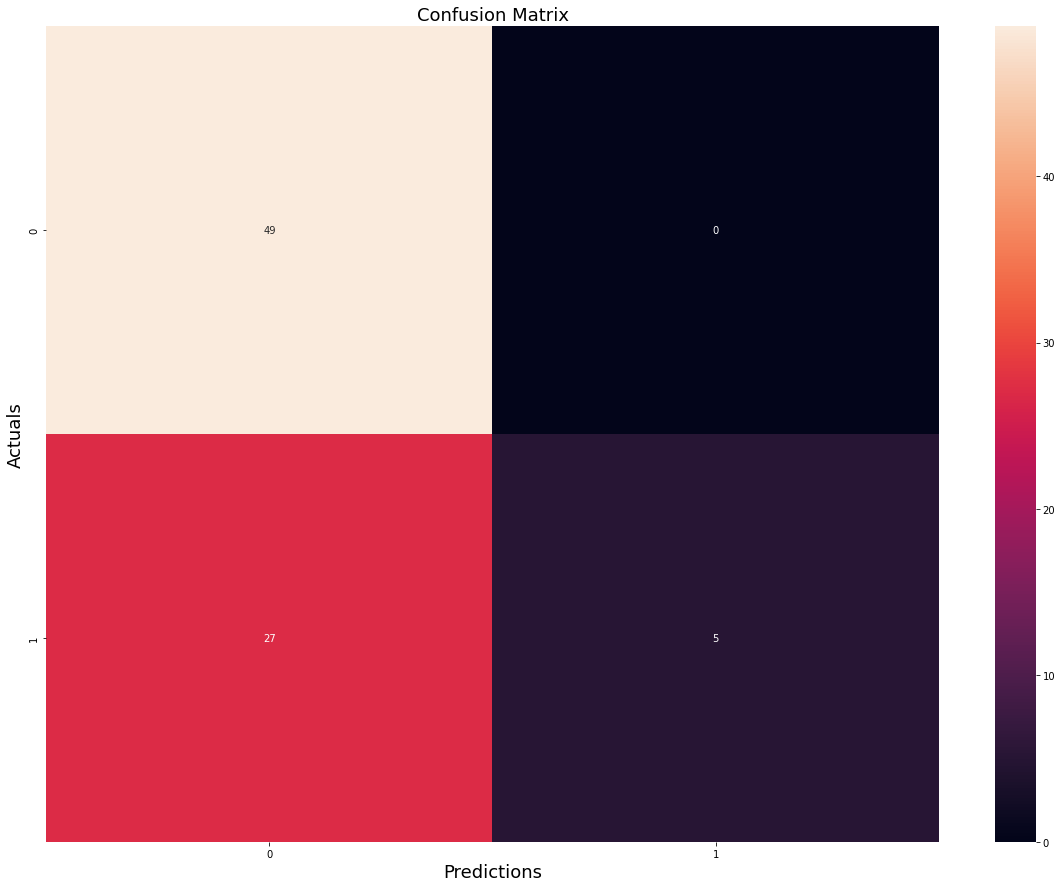

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicao_rede_test),annot=True,fmt='g')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [ ]:
print(classification_report(y_test,predicao_rede_test));

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        49
           1       1.00      0.16      0.27        32

    accuracy                           0.67        81
   macro avg       0.82      0.58      0.53        81
weighted avg       0.79      0.67      0.58        81



##Curva ROC desbalanceado no dados de teste

In [ ]:
y_te = pd.DataFrame(y_test)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Falso Positivo', fontsize=16)
    plt.ylabel('Verdadeiro Positivo', fontsize=16)

In [ ]:
fpr_logis, tpr_logis, thresholds_logis= roc_curve(y_te,logis_test[:,1])

In [ ]:
fpr_random, tpr_random, thresholds_random= roc_curve(y_te,random_test[:,1])

In [ ]:
fpr_extra, tpr_extra, thresholds_extra = roc_curve(y_te,extra_test[:,1])

In [ ]:
fpr_xg_desb, tpr_xg_desb, thresholds_xg_desb= roc_curve(y_te,xg_test[:,1])

In [ ]:
fpr_tensor, tpr_tensor, thresholds_tensor= roc_curve(y_te,predicao_rede_test_prob)

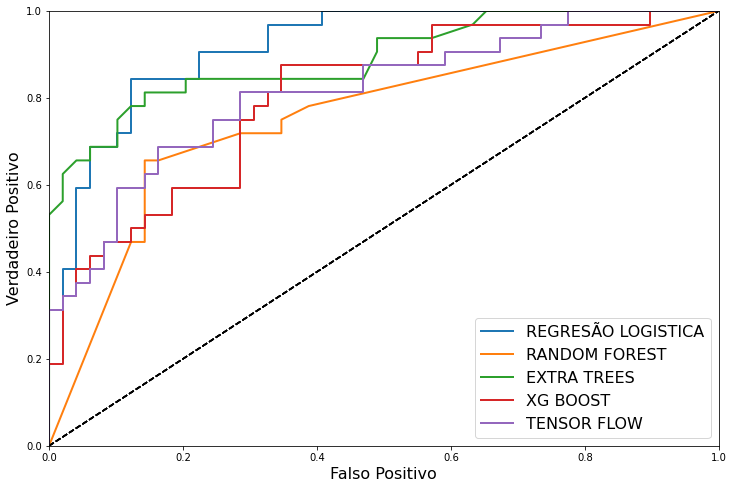

In [ ]:
plt.figure(figsize=(12, 8))
plot_roc_curve(fpr_logis, tpr_logis, "REGRESÃO LOGISTICA")
plot_roc_curve(fpr_random, tpr_random, "RANDOM FOREST")
plot_roc_curve(fpr_extra, tpr_extra, "EXTRA TREES")
plot_roc_curve(fpr_xg_desb, tpr_xg_desb, "XG BOOST")
plot_roc_curve(fpr_tensor, tpr_tensor, "TENSOR FLOW")
plt.legend(loc="lower right", fontsize=16)

# RESULTADOS DOS CLASSIFICADORES


In [ ]:
print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('REGRESSAO LOGISTICA:','                                        ','REGRESSAO LOGISTICA:')
print('PRECISAO:',precision_score(y_trein,log_predicao),'              ','PRECISAO:',precision_score(y_test,log_predicao_teste))
print('REVOCACAO:',recall_score(y_trein,log_predicao),'                ','REVOCACAO:',recall_score(y_test,log_predicao_teste))
print('F1 SCORE:',f1_score(y_trein,log_predicao),'                     ','F1 SCORE:',f1_score(y_test,log_predicao_teste))
print('AUC:',roc_auc_score(y_trein,log_predicao),'                     ','AUC:',roc_auc_score(y_test,log_predicao_teste))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('RANDOM FOREST:','                                                ','RANDOM FOREST:')
print('PRECISAO:',precision_score(y_trein,predicao_random_treino),'              ','PRECISAO:',precision_score(y_test,predicao_random_teste))
print('REVOCACAO:',recall_score(y_trein,predicao_random_treino),'                ','REVOCACAO:',recall_score(y_test,predicao_random_teste))
print('F1 SCORE:',f1_score(y_trein,predicao_random_treino),'                     ','F1 SCORE:',f1_score(y_test,predicao_random_teste))
print('AUC:',roc_auc_score(y_trein,predicao_random_treino),'                     ','AUC:',roc_auc_score(y_test,predicao_random_teste))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('EXTRA TREES:','                                                ','EXTRA TREES:')
print('PRECISAO:',precision_score(y_trein,predicao_extra_treino),'              ','PRECISAO:',precision_score(y_test,predicao_extra_test))
print('REVOCACAO:',recall_score(y_trein,predicao_extra_treino),'                ','REVOCACAO:',recall_score(y_test,predicao_extra_test))
print('F1 SCORE:',f1_score(y_trein,predicao_extra_treino),'                     ','F1 SCORE:',f1_score(y_test,predicao_extra_test))
print('AUC:',roc_auc_score(y_trein,predicao_extra_treino),'                     ','AUC:',roc_auc_score(y_test,predicao_extra_test))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('ADABOOST:','                                                ','XGBOOST:')
print('PRECISAO:',precision_score(y_trein,predicao_xg_treino),'              ','PRECISAO:',precision_score(y_test,predicao_xg_teste))
print('REVOCACAO:',recall_score(y_trein,predicao_xg_treino),'                ','REVOCACAO:',recall_score(y_test,predicao_xg_teste))
print('F1 SCORE:',f1_score(y_trein,predicao_xg_treino),'                     ','F1 SCORE:',f1_score(y_test,predicao_xg_teste))
print('AUC:',roc_auc_score(y_trein,predicao_xg_treino),'                     ','AUC:',roc_auc_score(y_test,predicao_xg_teste))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('XBOOST:','                                                ','XGBOOST:')
print('PRECISAO:',precision_score(y_trein,predicao_rede_treino),'              ','PRECISAO:',precision_score(y_test,predicao_rede_test))
print('REVOCACAO:',recall_score(y_trein,predicao_rede_treino),   '                ','REVOCACAO:',recall_score(y_test,predicao_rede_test))
print('F1 SCORE:',f1_score(y_trein,predicao_rede_treino),'                     ','F1 SCORE:',f1_score(y_test,predicao_rede_test))
print('AUC:',roc_auc_score(y_trein,predicao_rede_treino),'                     ','AUC:',roc_auc_score(y_test,predicao_rede_test))
print('--------------------------------------------------------------------------------------------------------------')


RESULTADOS NOS DADOS DE TREINAMENTO                           RESULTADOS NOS DADOS DE TESTE
REGRESSAO LOGISTICA:                                          REGRESSAO LOGISTICA:
PRECISAO: 0.9047619047619048                PRECISAO: 0.88
REVOCACAO: 0.8636363636363636                  REVOCACAO: 0.6875
F1 SCORE: 0.8837209302325582                       F1 SCORE: 0.7719298245614036
AUC: 0.8922142214221422                       F1 SCORE: 0.8131377551020409
--------------------------------------------------------------------------------------------------------------
RESULTADOS NOS DADOS DE TREINAMENTO                           RESULTADOS NOS DADOS DE TESTE
RANDOM FOREST:                                                  RANDOM FOREST:
PRECISAO: 0.9259259259259259                PRECISAO: 0.8181818181818182
REVOCACAO: 0.8522727272727273                  REVOCACAO: 0.5625
F1 SCORE: 0.8875739644970415                       F1 SCORE: 0.6666666666666666
AUC: 0.8964333933393339                       

# CRIANDO ALGORITIMOS COM GRID SHERCH

###Criando o algoritimo Random Florest com grid search 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=300, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')
                       

(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'
                                              

In [ ]:
param_grid = {'max_depth': [1,2,60,70,80,90,100],
              'max_features': [1, 3, 4,5,6,8,10],
              'splitter':['best', 'random'],
                'random_state':[50,80,100,150,180,200,300,400,500,600,700,800,900,1000],
                 'criterion':['gini','entropy'],
                 }

In [ ]:
class_random_desb_grid= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)


In [ ]:
class_random_desb_grid.fit(treino_transformada, y_trein)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 60, 70, 80, 90, 100],
                         'max_features': [1, 3, 4, 5, 6, 8, 10],
                         'random_state': [50, 80, 100, 150, 180, 200, 300, 400,
                                          500, 600, 700, 800, 900, 1000],
                         'splitter': ['best', 'random']})

In [ ]:
class_random_desb_grid.best_estimator_

DecisionTreeClassifier(max_depth=60, max_features=4, random_state=100,
                       splitter='random')

In [ ]:
class_random_desb_grid.best_score_

0.8358463726884778

####Treinando com os melhores parametros

In [ ]:
class_random_grid= DecisionTreeClassifier(max_depth=60, max_features=4, random_state=100,
                       splitter='random')
class_random_grid.fit(treino_transformada, y_trein)

DecisionTreeClassifier(max_depth=60, max_features=4, random_state=100,
                       splitter='random')

####Avaliando nos dados de treinamento





In [ ]:
predicao_random_treino_grid= class_random_grid.predict(treino_transformada)

Text(0.5, 1.0, 'Matriz de confusao')

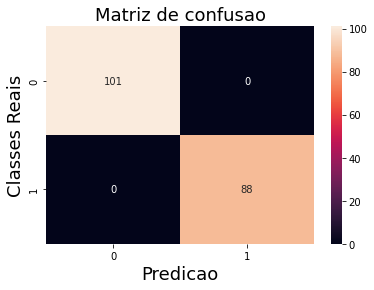

In [ ]:
sns.heatmap(confusion_matrix(y_trein,predicao_random_treino_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
cross_val_score(class_random_grid, treino_transformada, y_trein, cv=10)

array([0.68421053, 0.73684211, 0.84210526, 0.89473684, 0.89473684,
       0.78947368, 0.84210526, 0.78947368, 0.63157895, 0.88888889])

In [ ]:
print(classification_report(y_trein,predicao_random_treino_grid));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        88

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



####Avaliando nos dados de test


In [ ]:
predicao_random_teste_grid = class_random_grid.predict(teste_transformado)

In [ ]:
prob_random_grid= cross_val_predict(class_random_grid, teste_transformado, y_test, cv=10,
                                    method="predict_proba")

Text(0.5, 1.0, 'Matriz de confusao')

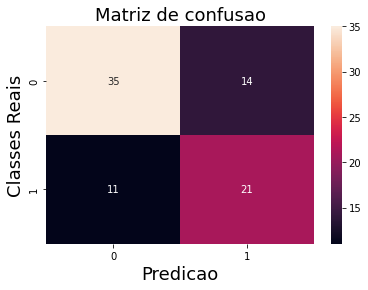

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicao_random_teste_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
print(classification_report(y_test,predicao_random_teste_grid));

              precision    recall  f1-score   support

           0       0.76      0.71      0.74        49
           1       0.60      0.66      0.63        32

    accuracy                           0.69        81
   macro avg       0.68      0.69      0.68        81
weighted avg       0.70      0.69      0.69        81



###Criando o algoritimo EXTRA TREES com grid search 

In [ ]:
param_grid={
        'n_estimators': [10,500,600,700,800,900,1000],
        'criterion':['gini','entropy'],
        'max_features': [1,10,50,100,200],
        'max_features':['auto', 'sqrt', 'log2'],
        'min_samples_leaf': [10,100,200,300,600,800],
        'min_samples_split': [10,100,200,300,600,800]}

In [ ]:
random_search_desb = RandomizedSearchCV(ExtraTreesClassifier(), param_grid,
                                n_iter=50, cv=5, scoring='recall',
                                verbose=2, n_jobs=4, random_state=42)

In [ ]:
random_search_desb.fit(treino_transformada, y_trein)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=50, n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 100, 200, 300,
                                                             600, 800],
                                        'min_samples_split': [10, 100, 200, 300,
                                                              600, 800],
                                        'n_estimators': [10, 500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='recall', verbose=2)

In [ ]:
random_search_desb.best_estimator_

ExtraTreesClassifier(criterion='entropy', min_samples_leaf=300,
                     min_samples_split=300, n_estimators=800)

####Treinando com os melhores parametros

ExtraTreesClassifier(criterion='entropy', min_samples_leaf=300,
                     min_samples_split=300, n_estimators=800)

In [ ]:
extra_tree_desb_grid = ExtraTreesClassifier(criterion='entropy', min_samples_leaf=300,
                     min_samples_split=300, n_estimators=800)
extra_tree_desb_grid.fit(treino_transformada, y_trein)

ExtraTreesClassifier(criterion='entropy', min_samples_leaf=300,
                     min_samples_split=300, n_estimators=800)

####Avaliando nos dados de treinamento

In [ ]:
predicao_extra_treino_grid= extra_tree_desb_grid.predict(treino_transformada)

Text(0.5, 1.0, 'Matriz de confusao')

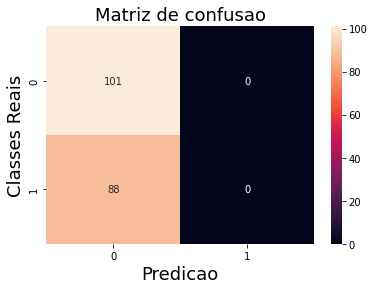

In [ ]:
sns.heatmap(confusion_matrix(y_trein,predicao_extra_treino_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
cross_val_score(extra_tree_desb_grid, treino_transformada, y_trein, cv=10)


array([0.57894737, 0.52631579, 0.52631579, 0.52631579, 0.52631579,
       0.52631579, 0.52631579, 0.52631579, 0.52631579, 0.55555556])

In [ ]:
print(classification_report(y_trein,predicao_extra_treino_grid));

              precision    recall  f1-score   support

           0       0.53      1.00      0.70       101
           1       0.00      0.00      0.00        88

    accuracy                           0.53       189
   macro avg       0.27      0.50      0.35       189
weighted avg       0.29      0.53      0.37       189



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Avaliando nos dados de teste

In [ ]:
predicao_extra_test_grid= extra_tree_desb_grid.predict(teste_transformado)

In [ ]:
prob_extra_grid_treino= cross_val_predict(extra_tree_desb_grid, teste_transformado, y_test, cv=10,
                                    method="predict_proba")

Text(0.5, 1.0, 'Matriz de confusao')

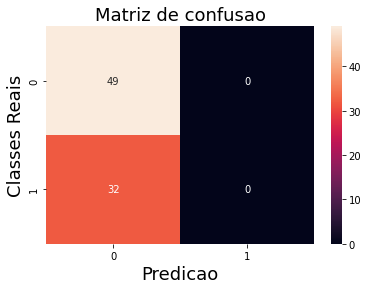

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicao_extra_test_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
print(classification_report(y_test,predicao_extra_test_grid));

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        49
           1       0.00      0.00      0.00        32

    accuracy                           0.60        81
   macro avg       0.30      0.50      0.38        81
weighted avg       0.37      0.60      0.46        81



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Criando o algoritimo ADBOOST com grid search 

In [ ]:
param_grid={
        'n_estimators': [10, 50, 100, 500,1000],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0,1.1,1.2],
        'algorithm':['SAMME', 'SAMME.R']}

In [ ]:
class_ada_desb_grid= GridSearchCV(AdaBoostClassifier(), param_grid, cv=5)

In [ ]:
class_ada_desb_grid.fit(treino_transformada, y_trein)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0, 1.1,
                                           1.2],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [ ]:
class_ada_desb_grid.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [ ]:
class_ada_desb_grid.best_score_

0.8571834992887624

####Treinando com os melhores parametros
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.1,
                   n_estimators=1000, random_state=None)

In [ ]:
ada_clf_desb_grid = AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [ ]:
ada_clf_desb_grid.fit(treino_transformada, y_trein)

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

####Avaliando nos dados de treinamento

In [ ]:
predicao_ada_treino_grid= ada_clf_desb_grid.predict(treino_transformada)

Text(0.5, 1.0, 'Matriz de confusao')

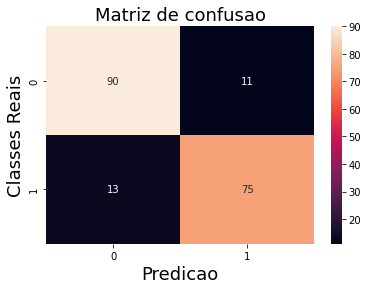

In [ ]:
sns.heatmap(confusion_matrix(y_trein,predicao_ada_treino_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
cross_val_score(ada_clf_desb_grid, treino_transformada, y_trein, cv=10)


array([0.73684211, 0.73684211, 0.84210526, 1.        , 0.89473684,
       0.78947368, 0.84210526, 0.84210526, 0.84210526, 0.83333333])

In [ ]:
print(classification_report(y_trein,predicao_ada_treino_grid));

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       101
           1       0.87      0.85      0.86        88

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



####Avaliando nos dados de teste

In [ ]:
predicao_ad_teste_grid= ada_clf_desb_grid.predict(teste_transformado)

In [ ]:
prob_ad_grid_test= cross_val_predict(ada_clf_desb_grid, teste_transformado, y_test, cv=10,method="predict_proba")
prob_ad_grid_test

array([[0.45521603, 0.54478397],
       [0.4799987 , 0.5200013 ],
       [0.61521303, 0.38478697],
       [0.61553466, 0.38446534],
       [0.52345663, 0.47654337],
       [0.46700548, 0.53299452],
       [0.61331229, 0.38668771],
       [0.58557458, 0.41442542],
       [0.46069258, 0.53930742],
       [0.61264402, 0.38735598],
       [0.51996068, 0.48003932],
       [0.51626061, 0.48373939],
       [0.4659191 , 0.5340809 ],
       [0.36123435, 0.63876565],
       [0.50689489, 0.49310511],
       [0.52905577, 0.47094423],
       [0.4412239 , 0.5587761 ],
       [0.5319727 , 0.4680273 ],
       [0.40557206, 0.59442794],
       [0.53524212, 0.46475788],
       [0.40994798, 0.59005202],
       [0.548348  , 0.451652  ],
       [0.5268755 , 0.4731245 ],
       [0.61403939, 0.38596061],
       [0.494218  , 0.505782  ],
       [0.41571387, 0.58428613],
       [0.60117737, 0.39882263],
       [0.54365108, 0.45634892],
       [0.60300256, 0.39699744],
       [0.48949417, 0.51050583],
       [0.

Text(0.5, 1.0, 'Matriz de confusao')

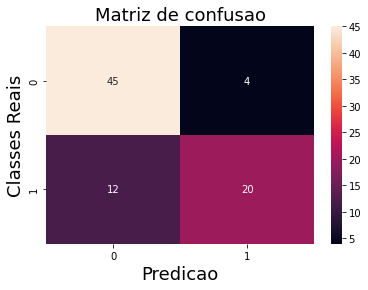

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicao_ad_teste_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
print(classification_report(y_test,predicao_ad_teste_grid));

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        49
           1       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



###Criando o algoritimo XGBOOST com grid search 

In [ ]:
param_grid={
        'loss':['deviance', 'exponential'],
        'n_estimators': [10, 50, 100, 500,1000,2000],
         'criterion':['friedman_mse', 'mse', 'mae'],
        'learning_rate': [0.0001,0.1, 1.0,1.1,1.2],
        'max_features':['auto', 'sqrt', 'log2']
        }

In [ ]:

xg_search=GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

In [ ]:
xg_search.fit(treino_transformada, y_trein)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.0001, 0.1, 1.0, 1.1, 1.2],
                         'loss': ['deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500, 1000, 2000]})

####Treinando com os melhores parametros



In [ ]:
xg_search.best_estimator_

GradientBoostingClassifier(criterion='mae', max_features='log2')

In [ ]:
xg_grid = GradientBoostingClassifier(criterion='mae', max_features='log2')
xg_grid.fit(treino_transformada, y_trein)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1286: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

GradientBoostingClassifier(criterion='mae', max_features='log2')

####Avaliando nos dados de treinamento

In [ ]:
predicao_xg_treino_grid= xg_grid.predict(treino_transformada)

Text(0.5, 1.0, 'Matriz de confusao')

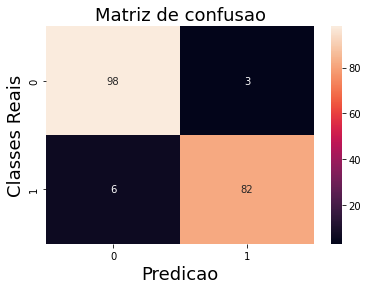

In [ ]:
sns.heatmap(confusion_matrix(y_trein,predicao_xg_treino_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
cross_val_score(xg_grid, treino_transformada, y_trein, cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1286: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

array([0.68421053, 0.84210526, 0.84210526, 1.        , 0.89473684,
       0.73684211, 0.84210526, 0.84210526, 0.84210526, 0.88888889])

In [ ]:
print(classification_report(y_trein,predicao_xg_treino_grid));

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       101
           1       0.96      0.93      0.95        88

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189



####Avaliando nos dados de teste

In [ ]:
predicao_xg_teste_grid= xg_grid.predict(teste_transformado)

In [ ]:
prob_xg_grid_test= cross_val_predict(xg_grid, teste_transformado, y_test, cv=10,method="predict_proba")
prob_xg_grid_test

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1286: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

array([[0.05484515, 0.94515485],
       [0.13447467, 0.86552533],
       [0.98853382, 0.01146618],
       [0.97243622, 0.02756378],
       [0.89043152, 0.10956848],
       [0.32350725, 0.67649275],
       [0.95683005, 0.04316995],
       [0.94760418, 0.05239582],
       [0.22021521, 0.77978479],
       [0.99057607, 0.00942393],
       [0.93461875, 0.06538125],
       [0.96132929, 0.03867071],
       [0.02872368, 0.97127632],
       [0.01656721, 0.98343279],
       [0.01907002, 0.98092998],
       [0.29474228, 0.70525772],
       [0.11495102, 0.88504898],
       [0.68065505, 0.31934495],
       [0.00364913, 0.99635087],
       [0.05379601, 0.94620399],
       [0.00669967, 0.99330033],
       [0.71716242, 0.28283758],
       [0.929267  , 0.070733  ],
       [0.98054258, 0.01945742],
       [0.74269417, 0.25730583],
       [0.00784474, 0.99215526],
       [0.83908955, 0.16091045],
       [0.48136081, 0.51863919],
       [0.99186315, 0.00813685],
       [0.72188291, 0.27811709],
       [0.

Text(0.5, 1.0, 'Matriz de confusao')

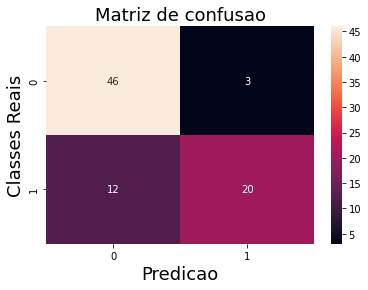

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicao_xg_teste_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
print(classification_report(y_test,predicao_xg_teste_grid));

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        49
           1       0.87      0.62      0.73        32

    accuracy                           0.81        81
   macro avg       0.83      0.78      0.79        81
weighted avg       0.82      0.81      0.81        81



## CRIANDO O ALGORITIMO REGRESSAO LOGISTICA COM GRID SCEARCH

In [ ]:
param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'tol':[0.0001, 0.001, 0.01, 0.1, 1.0,1.1,1.2],
        'C':[0.0001, 0.001, 0.01, 0.1, 1.0,1.1,1.2],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        
        }

In [ ]:
logis_grid= GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [ ]:
logis_grid.fit(treino_transformada,y_trein)

In [ ]:
logis_grid.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear', tol=0.1)

In [ ]:
logis_grid.best_score_

0.8625889046941678

In [ ]:
#LogisticRegression(penalty='l1', solver='liblinear', tol=0.1)
log_reg = LogisticRegression(penalty='l1', solver='liblinear', tol=0.1)
log_reg.fit(treino_transformada,y_trein)

LogisticRegression(penalty='l1', solver='liblinear', tol=0.1)

### AVALIANDO O MODELO

In [ ]:
log_predicao = log_reg.predict(treino_transformada)

In [ ]:
## confusion matriz
from sklearn.metrics import confusion_matrix

confusion_matrix(y_trein,log_predicao)

array([[93,  8],
       [14, 74]])

In [ ]:
##PRECISAO = QUANTOS DOS QUE O MODELO DICE QUE SAO VERDADEIROS ELE ACERTOU
from sklearn.metrics import precision_score, recall_score

precisao_logistica = precision_score(y_trein,log_predicao)## se a classe estiver categorica use "",average="binary", pos_label="eventos de recorrência"""
precisao_logistica

0.9024390243902439

In [ ]:
## QUANTO DOS VALORES VERDADEIROS O MODELO ACERTOU
revocacao_logistica = recall_score(y_trein,log_predicao,average="binary")
revocacao_logistica

0.8409090909090909

In [ ]:
from sklearn.metrics import f1_score
f1_logistica = f1_score(y_trein,log_predicao)
f1_logistica

0.8705882352941177

In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(log_reg, treino_transformada, y_trein, cv=10, scoring="accuracy")
validacao_logistica = a.mean()
validacao_logistica

0.852046783625731

###AVALIANDO MODELO NOS DADOS DE TESTE

In [ ]:
log_predicao_teste = log_reg.predict(teste_transformado)

In [ ]:
confusion_matrix(y_test,log_predicao_teste)

array([[48,  1],
       [11, 21]])

In [ ]:
##PRECISAO = QUANTOS DOS QUE O MODELO DICE QUE SAO VERDADEIROS ELE ACERTOU
from sklearn.metrics import precision_score, recall_score

precisao_logistica_test = precision_score(y_test,log_predicao_teste)## se a classe estiver categorica use "",average="binary", pos_label="eventos de recorrência"""
precisao_logistica_test

0.9545454545454546

In [ ]:
## QUANTO DOS VALORES VERDADEIROS O MODELO ACERTOU
revocacao_logistica_teste = recall_score(y_test,log_predicao_teste,average="binary")
revocacao_logistica_teste

0.65625

In [ ]:
from sklearn.metrics import f1_score
f1_logistica = f1_score(y_test,log_predicao_teste)
f1_logistica

0.7777777777777778

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_predicao_teste));

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        49
           1       0.95      0.66      0.78        32

    accuracy                           0.85        81
   macro avg       0.88      0.82      0.83        81
weighted avg       0.87      0.85      0.84        81



In [ ]:
logis_test= cross_val_predict(log_reg, teste_transformado, y_test, cv=10,method="predict_proba")
logis_test

array([[0.18704721, 0.81295279],
       [0.15903294, 0.84096706],
       [0.98082322, 0.01917678],
       [0.96895429, 0.03104571],
       [0.50611307, 0.49388693],
       [0.24599936, 0.75400064],
       [0.9855179 , 0.0144821 ],
       [0.92975676, 0.07024324],
       [0.48745402, 0.51254598],
       [0.95102204, 0.04897796],
       [0.41187582, 0.58812418],
       [0.74759605, 0.25240395],
       [0.10437397, 0.89562603],
       [0.02031882, 0.97968118],
       [0.70199211, 0.29800789],
       [0.86905813, 0.13094187],
       [0.07127701, 0.92872299],
       [0.76701324, 0.23298676],
       [0.03091264, 0.96908736],
       [0.74938832, 0.25061168],
       [0.02103623, 0.97896377],
       [0.68172774, 0.31827226],
       [0.72969593, 0.27030407],
       [0.97839606, 0.02160394],
       [0.68182168, 0.31817832],
       [0.01216096, 0.98783904],
       [0.9228385 , 0.0771615 ],
       [0.29427185, 0.70572815],
       [0.97239453, 0.02760547],
       [0.63397569, 0.36602431],
       [0.

##RESULTADOS DOS CLASSIFICADORES


In [ ]:
print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('REGRESSAO LOGISTICA:','                                        ','REGRESSAO LOGISTICA:')
print('PRECISAO:',precision_score(y_trein,log_predicao),'              ','PRECISAO:',precision_score(y_test,log_predicao_teste))
print('REVOCACAO:',recall_score(y_trein,log_predicao),'                ','REVOCACAO:',recall_score(y_test,log_predicao_teste))
print('F1 SCORE:',f1_score(y_trein,log_predicao),'                     ','F1 SCORE:',f1_score(y_test,log_predicao_teste))
print('AUC:',roc_auc_score(y_trein,log_predicao),'                     ','F1 SCORE:',roc_auc_score(y_test,log_predicao_teste))
print('--------------------------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('RANDOM FOREST:','                                                ','RANDOM FOREST:')
print('PRECISAO:',precision_score(y_trein,predicao_random_treino_grid),'              ','PRECISAO:',precision_score(y_test,predicao_random_teste_grid))
print('REVOCACAO:',recall_score(y_trein,predicao_random_treino_grid),'                ','REVOCACAO:',recall_score(y_test,predicao_random_teste_grid))
print('F1 SCORE:',f1_score(y_trein,predicao_random_treino_grid),'                     ','F1 SCORE:',f1_score(y_test,predicao_random_teste_grid))
print('AUC:',roc_auc_score(y_trein,predicao_random_treino_grid),'                     ','F1 SCORE:',roc_auc_score(y_test,predicao_random_teste_grid))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('EXTRA TREES:','                                                ','EXTRA TREES:')
print('PRECISAO:',precision_score(y_trein,predicao_extra_treino_grid),'              ','PRECISAO:',precision_score(y_test,predicao_extra_test_grid))
print('REVOCACAO:',recall_score(y_trein,predicao_extra_treino_grid),'                ','REVOCACAO:',recall_score(y_test,predicao_extra_test_grid))
print('F1 SCORE:',f1_score(y_trein,predicao_extra_treino_grid),'                     ','F1 SCORE:',f1_score(y_test,predicao_extra_test_grid))
print('AUC:',roc_auc_score(y_trein,predicao_extra_treino_grid),'                     ','F1 SCORE:',roc_auc_score(y_test,predicao_extra_test_grid))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('ADBOOST:','                                                ','ADBOOST:')
print('PRECISAO:',precision_score(y_trein,predicao_ada_treino_grid),'              ','PRECISAO:',precision_score(y_test,predicao_ad_teste_grid))
print('REVOCACAO:',recall_score(y_trein,predicao_ada_treino_grid),'                ','REVOCACAO:',recall_score(y_test,predicao_ad_teste_grid))
print('F1 SCORE:',f1_score(y_trein,predicao_ada_treino_grid),'                     ','F1 SCORE:',f1_score(y_test,predicao_ad_teste_grid))
print('AUC:',roc_auc_score(y_trein,predicao_ada_treino_grid),'                     ','F1 SCORE:',roc_auc_score(y_test,predicao_ad_teste_grid))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('XBOOST:','                                                ','XGBOOST:')
print('PRECISAO:',precision_score(y_trein,predicao_xg_treino_grid),'              ','PRECISAO:',precision_score(y_test,predicao_xg_teste_grid))
print('REVOCACAO:',recall_score(y_trein,predicao_xg_treino_grid),   '                ','REVOCACAO:',recall_score(y_test,predicao_xg_teste_grid))
print('F1 SCORE:',f1_score(y_trein,predicao_xg_treino_grid),'                     ','F1 SCORE:',f1_score(y_test,predicao_xg_teste_grid))
print('AUC:',roc_auc_score(y_trein,predicao_xg_treino_grid),'                     ','F1 SCORE:',roc_auc_score(y_test,predicao_xg_teste_grid))
print('--------------------------------------------------------------------------------------------------------------')


RESULTADOS NOS DADOS DE TREINAMENTO                           RESULTADOS NOS DADOS DE TESTE
REGRESSAO LOGISTICA:                                          REGRESSAO LOGISTICA:
PRECISAO: 0.9024390243902439                PRECISAO: 0.9545454545454546
REVOCACAO: 0.8409090909090909                  REVOCACAO: 0.65625
F1 SCORE: 0.8705882352941177                       F1 SCORE: 0.7777777777777778
AUC: 0.8808505850585059                       F1 SCORE: 0.8179209183673469
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
RESULTADOS NOS DADOS DE TREINAMENTO                           RESULTADOS NOS DADOS DE TESTE
RANDOM FOREST:                                                  RANDOM FOREST:
PRECISAO: 1.0                PRECISAO: 0.6
REVOCACAO: 1.0                  REVOCACAO: 0.65625
F1 SCORE: 1.0                       F1 SCORE

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
